## Stemming and Lemmatization




In [ ]:
import nltk
from nltk.stem import PorterStemmer

porter = PorterStemmer()

In [ ]:
porter.stem('WaLKing')
sentence = "Stemming is not more sophisticated than lemmatization unnecessary".split()
for token in sentence:
  print(porter.stem(token), end=" ")

stem is not more sophist than lemmat unnecessari 

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatizer.lemmatize('was', pos=wordnet.VERB)

sentence = "Stemming is not more sophisticated than lemmatization unnecessary"
sen = sentence.split()
for token in sen:
  print(lemmatizer.lemmatize(token, pos=wordnet.VERB), end=" ")

Stemming be not more sophisticate than lemmatization unnecessary 

In [ ]:
def get_wordnet_pos(tag):
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
sentence = "Donald Trump has a devoted following".split() #following is a noun here and should not be changed
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [ ]:
for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

Donald Trump have a devote following 

In [ ]:
sentence = "The cat was following the bird as it flew by".split() #following is a verb here and should be changed

words_and_tags = nltk.pos_tag(sentence)
words_and_tags = nltk.pos_tag(sentence)

for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

The cat be follow the bird a it fly by 

## Count Vectorizer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #can use any other model
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

File ‘bbc_text_cls.csv’ already there; not retrieving.



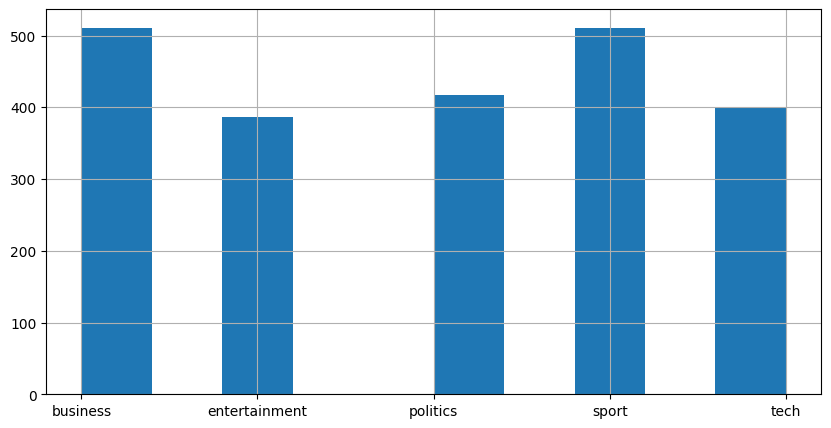

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

df = pd.read_csv('bbc_text_cls.csv')
# df.head()

inputs = df['text']
labels = df['labels']
labels.hist(figsize=(10, 5));

inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123) #random state = 123 ensures the same train test data is obtained everytime the code is run


In [ ]:
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test) #converting the inputs (documents) into a matrix, note that the label are not converted
Xtrain
(Xtrain != 0).sum()
# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [ ]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain)*100)
print("test score:", model.score(Xtest, Ytest)*100)
Xtrain.shape # y coordinate will tell the total number of words

### Same but Using Stopwords

In [ ]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain)*100)
print("test score:", model.score(Xtest, Ytest)*100)
Xtrain.shape

# use stopwords in other techniques as well to see results

### Same but using Lemmatization

In [ ]:
#with lemmatization
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

def lemma_tokenizer(doc): # can create a function instead of a class (both are same)
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]


# with lemmatization
vectorizer = CountVectorizer(tokenizer=lemma_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain)*100)
print("test score:", model.score(Xtest, Ytest)*100)
Xtrain.shape

### Same but with Stemming

In [ ]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

def stemmer(doc):
  porter = PorterStemmer()
  tokens = word_tokenize(doc)
  return [porter.stem(i) for i in tokens]

# with stemming
vectorizer = CountVectorizer(tokenizer=stemmer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
Xtrain.shape

### Same but using simple string split tokenizer

In [ ]:
def simple_tokenizer(s):
  return s.split()
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
Xtrain.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9952038369304557
test score: 0.9712746858168761


(1668, 52144)

## TF-IDF Recommender

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv # if it doesn't work, just wait or try working on a new notebook
df = pd.read_csv('tmdb_5000_movies.csv')
df['genres'][1]
df.head()

--2023-06-28 16:00:28--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  6.77MB/s    in 0.8s    

2023-06-28 16:00:30 (6.77 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [ ]:
j = json.loads(x['genres'])
j[0]['name']
ref = []
for i in range(len(j)):
  ref.append(''.join(j[i]['name'].split()))

genre = " ".join(ref)
genre


'Action Adventure Fantasy ScienceFiction'

In [ ]:
def genres_and_keywords(row):

  j = json.loads(row['genres'])
  ref = []
  for i in range(len(j)):
    ref.append(''.join(j[i]['name'].split()))

  genre = " ".join(ref)

  j = json.loads(row['keywords'])
  ref = []
  for i in range(len(j)):
    ref.append(''.join(j[i]['name'].split()))

  keywords = " ".join(ref)

  title = row['title']

  return (genre + " " + keywords)


genres_and_keywords(x)

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [ ]:
df['string'] = df.apply(genres_and_keywords, axis=1)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [ ]:
tfidf = TfidfVectorizer(max_features=2000)

X = tfidf.fit_transform(df['string'])
X


<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [ ]:
movie2idx = pd.Series(df.index, index=df['title'])
idx = movie2idx['Scream 3']
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()
scores

array([0., 0., 0., ..., 0., 0., 0.])

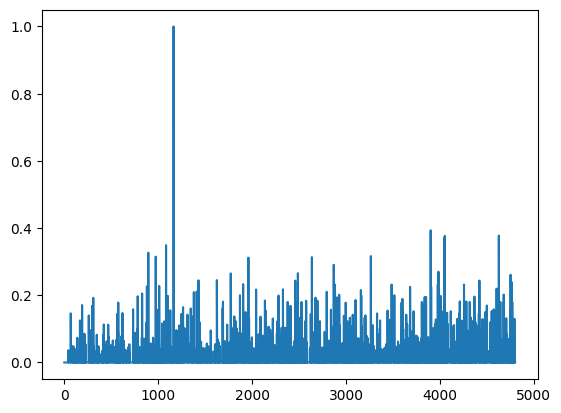

In [ ]:
plt.plot(scores)

[1164 3902 4628 ... 1714 1720 4802]


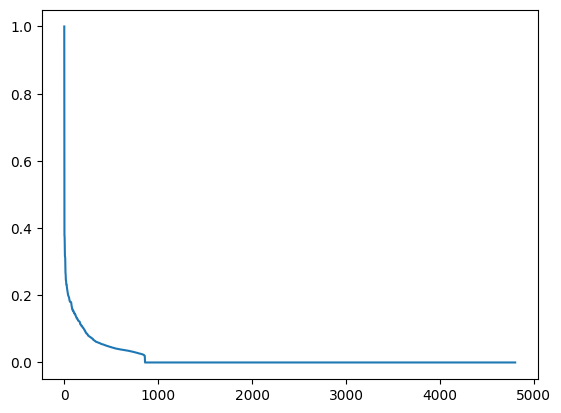

In [ ]:
print((-scores).argsort())
plt.plot(scores[(-scores).argsort()])

In [ ]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

df['title'].iloc[recommended_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [ ]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
  idx = movie2idx[title]
  if type(idx) == pd.Series:
    idx = idx.iloc[0]

  # calculate the pairwise similarities for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  # currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  # get the indexes of the highest scoring movies
  # get the first K recommendations
  # don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  # return the titles of the recommendations
  return df['title'].iloc[recommended_idx]

In [ ]:
print(recommend('Titanic'))

2925    A Walk to Remember
491                Pompeii
3552     Somewhere in Time
3229             Quo Vadis
3818     The House of Sand
Name: title, dtype: object


## TF-IDF from scratch

In [ ]:
import pandas as pd
import numpy as np
import nltk

from nltk import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

df = pd.read_csv('bbc_text_cls.csv')
df.head()

--2023-06-20 15:05:53--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.1s    

2023-06-20 15:05:54 (51.0 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
# populate word2idx
# convert documents into sequences of ints / ids / indices
idx = 0
word2idx = {}
tokenized_docs = []
for doc in df['text']:
  words = word_tokenize(doc.lower())
  doc_as_int = []
  for word in words:
    if word not in word2idx:
      word2idx[word] = idx
      idx += 1

    # save for later
    doc_as_int.append(word2idx[word])
  tokenized_docs.append(doc_as_int)

# After this basically we will have a list of list (tokenized_docs), where each list will be for a document which will contain the index of the words occuring in the document.
# The index in our word2idx dictionary. So basically the size of each list will be equal to the total number of tokens/words in that doc.

# reverse mapping
# if you do it smarter you can store it as a list
idx2word = {v:k for k, v in word2idx.items()}

In [ ]:
# number of documents
N = len(df['text'])
# number of words
V = len(word2idx)

# instantiate term-frequency matrix
# note: could have also used count vectorizer
tf = np.zeros((N, V))

# populate term-frequency counts
for i, doc_as_int in enumerate(tokenized_docs):
  for j in doc_as_int:
    tf[i, j] += 1


# compute IDF
document_freq = np.sum(tf > 0, axis=0) # document frequency (shape = (V,))
idf = np.log(N / document_freq)

# So this np.sum is basically iterating through every column of tf matrix, and for each column it is checking how many values are greater than 0 and then storing it. So for every word,
# we are iterating though all the row(document) and are counting this particular word is coming in how many documents.
#So the size of document_freq will be equal to the total number of unique words in the corpus.

tf_idf = tf * idf
tf_idf
# So basically the idf value of each word is getting multiplied by all the values in the corresponding column containing the same word in the tf matrix

array([[5.22260554, 9.5575688 , 2.86332511, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.86332511, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 7.70751219, 7.70751219,
        7.70751219]])

In [ ]:
# np.random.seed(123)
# pick a random document, show the top 5 terms (in terms of tf_idf score)
i = np.random.choice(N)
row = df.iloc[i]
print("Label:", row['labels'])
print("Text:", row['text'].split("\n", 1)[0])
print("Top 5 terms:")

scores = tf_idf[i]
indices = (-scores).argsort()

for j in indices[:5]:
  print(idx2word[j])

# So in this code now we are basically choosing a random ith row from df matrix which represents a particular document,
# then we are storing the value of the columns in the ith row in the tf_idf matrix, then we are sorting it in such a manner that instead of returning the highest score,
# it returns the index with the highest score. Then, we are simply returning the words in thes index using the reverse mapping.

Label: politics
Text: Blair 'said he would stand down'
Top 5 terms:
book
brown
blair
peston
stand


## Word Embedding using Word2Vec

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/GoogleNews-vectors-negative300.bin.gz # pre trained word embeddings, we use pretrained models most of the time

File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.



In [ ]:
!gunzip GoogleNews-vectors-negative300.bin.gz # Unzipping the file

In [ ]:
from gensim.models import KeyedVectors # This class has the necessary api to interact with the word embeddings
word_vectors = KeyedVectors.load_word2vec_format( # Using the word2vec model
  'GoogleNews-vectors-negative300.bin',
  binary=True
)

In [ ]:
def find_analogies(w1, w2, w3):
  # w1 - w2 = ? - w3
  # e.g. king - man = ? - woman
  #      ? = +king +woman -man
  r = word_vectors.most_similar(positive=[w1, w3], negative=[w2])
  print("%s - %s = %s - %s" % (w1, w2, r[0][0], w3))

In [ ]:
print(find_analogies('king', 'man', 'woman'))
print(find_analogies('france', 'paris', 'london'))
print(find_analogies('france', 'paris', 'rome'))
print(find_analogies('paris', 'france', 'italy'))
print(find_analogies('france', 'french', 'english'))
print(find_analogies('japan', 'japanese', 'chinese'))
print(find_analogies('japan', 'japanese', 'italian'))
print(find_analogies('december', 'november', 'june'))
print(find_analogies('miami', 'florida', 'texas'))
print(find_analogies('einstein', 'scientist', 'painter'))
print(find_analogies('man', 'woman', 'she'))
print(find_analogies('man', 'woman', 'aunt'))
print(find_analogies('man', 'woman', 'sister'))
print(find_analogies('man', 'woman', 'wife'))
print(find_analogies('man', 'woman', 'actress'))
print(find_analogies('man', 'woman', 'mother'))
print(find_analogies('nephew', 'niece', 'aunt'))

In [ ]:
def nearest_neighbors(w):
  r = word_vectors.most_similar(positive=[w])
  print("neighbors of: %s" % w)
  for word, score in r:
    print("\t%s" % word)

In [ ]:
print(nearest_neighbors('king'))
print(nearest_neighbors('france'))
print(nearest_neighbors('japan'))
print(nearest_neighbors('einstein'))
print(nearest_neighbors('woman'))
print(nearest_neighbors('nephew'))
print(nearest_neighbors('february'))

In [ ]:
import pandas as pd
!wget -nc https://nlp.stanford.edu/projects/glove/



File ‘index.html’ already there; not retrieving.

gzip: index.html: unknown suffix -- ignored


## Markov Model Text Classifier

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt

import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split

In [ ]:
input_files = [
  'edgar_allan_poe.txt',
  'robert_frost.txt',
]

!head edgar_allan_poe.txt
print("\n")
!head robert_frost.txt

In [ ]:
# collect data into lists
input_texts = []
labels = []

for label, f in enumerate(input_files):
  print(f"{f} corresponds to label {label}")

  for line in open(f):
    line = line.rstrip().lower()  # .rstrip simply removes all the white spaces in front of a line including the new line command "\n", therefore giving only single lines as output
    if line:
      # remove punctuation
      line = line.translate(str.maketrans('', '', string.punctuation))

      input_texts.append(line)
      labels.append(label)

input_texts



In [ ]:
train_text, test_text, Ytrain, Ytest = train_test_split(input_texts, labels)

print(len(Ytrain), len(Ytest))
print(train_text[:5])
print(Ytrain[:5])

In [ ]:
idx = 1
word2idx = {'<unk>': 0} # storing all unknown words at index 0, this is for words which does not appear in train set but will appear in test set
# populate word2idx
for text in train_text:
    tokens = text.split()
    for token in tokens:
      if token not in word2idx:
        word2idx[token] = idx
        idx += 1

print(len(word2idx))
word2idx

In [ ]:
# convert data into integer format
train_text_int = []
test_text_int = []

# Storing each line as integers instead of words to fit in the machine learning model

for text in train_text:
  tokens = text.split()
  line_as_int = [word2idx[token] for token in tokens]
  train_text_int.append(line_as_int)

for text in test_text:
  tokens = text.split()
  line_as_int = [word2idx.get(token, 0) for token in tokens] # get function will return 0 if there is no value corresponding to word2idx[token], this is for unknown words in the text
  test_text_int.append(line_as_int)

train_text_int[100:105]

In [ ]:
# initialize A and pi matrices - for both classes
V = len(word2idx)

A0 = np.ones((V, V))
pi0 = np.ones(V)

A1 = np.ones((V, V))
pi1 = np.ones(V)

# We are using np.ones instead of np.zeroes because we are using the add one smoothing, therefore these are the initial fake one's

In [ ]:
# compute counts for A and pi
def compute_counts(text_as_int, A, pi):
  for tokens in text_as_int:
    last_idx = None
    for idx in tokens:
      if last_idx is None:
        # it's the first word in a sentence
        pi[idx] += 1
      else:
        # the last word exists, so count a transition
        A[last_idx, idx] += 1

      # update last idx
      last_idx = idx

# The first word in each line is increasing a value corresponding to that index in pi
# After that all the words are simply increasing a value for transition corresponding to that row n column in A

compute_counts([t for t, y in zip(train_text_int, Ytrain) if y == 0], A0, pi0)
compute_counts([t for t, y in zip(train_text_int, Ytrain) if y == 1], A1, pi1)

# We are first zipping the train_text_int and Ytrain and then looping through them and saving train_text_int element only if the corresponding Ytrain element is 0 or 1.
# This is to ensure that each time we are taking the lines of a particular class only.

In [ ]:
# normalize A and pi so they are valid probability matrices
# convince yourself that this is equivalent to the formulas shown before
A0 /= A0.sum(axis=1, keepdims=True)
pi0 /= pi0.sum()

# This is to ensure that the sum of probability across a row is 1. The sum of probability that a word will transition to another words is 1.

A1 /= A1.sum(axis=1, keepdims=True)
pi1 /= pi1.sum()

# log A and pi since we don't need the actual probs
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)

In [ ]:
# compute priors
count0 = sum(y == 0 for y in Ytrain)
count1 = sum(y == 1 for y in Ytrain)
total = len(Ytrain)
p0 = count0 / total
p1 = count1 / total
logp0 = np.log(p0)
logp1 = np.log(p1)
p0, p1

# Probability that a randomly picked line will be of class 0 or 1

(0.33126934984520123, 0.6687306501547987)

In [ ]:
# build a classifier
class Classifier:
  def __init__(self, logAs, logpis, logpriors):
    self.logAs = logAs
    self.logpis = logpis
    self.logpriors = logpriors
    self.K = len(logpriors) # number of classes

  def _compute_log_likelihood(self, input_, class_): # Input_ is a line
    logA = self.logAs[class_]
    logpi = self.logpis[class_]

    last_idx = None
    logprob = 0
    for idx in input_:
      if last_idx is None:
        # it's the first token
        logprob += logpi[idx]
      else:
        logprob += logA[last_idx, idx]

      # update last_idx
      last_idx = idx

    return logprob

  def predict(self, inputs): # Inputs is a set of lines
    predictions = np.zeros(len(inputs))
    for i, input_ in enumerate(inputs):
      posteriors = [self._compute_log_likelihood(input_, c) + self.logpriors[c] \
             for c in range(self.K)]
      pred = np.argmax(posteriors) # Returning the index of maximum probability, so that we know which class has the highest probability.
      predictions[i] = pred
    return predictions

# Note: We can also use tradition .fit methods from the scikit learn class to do the same

In [ ]:
# each array must be in order since classes are assumed to index these lists
clf = Classifier([logA0, logA1], [logpi0, logpi1], [logp0, logp1])

In [ ]:
Ptrain = clf.predict(train_text_int)
print(f"Train acc: {np.mean(Ptrain == Ytrain)}")
Ptest = clf.predict(test_text_int)
print(f"Test acc: {np.mean(Ptest == Ytest)}")

# Calculating the mean of the times our calculate class = to the actual class from train set (no. of times (ptrain=ytrain) / total number of elements in train_text_int)

Train acc: 0.9944272445820433
Test acc: 0.8051948051948052


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

# read about F-score: https://en.wikipedia.org/wiki/F-score
# Because are classes are imbalance, i.e. 30% to 70% ratio in class probabilities

In [ ]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[ 526,    9],
       [   0, 1080]])

In [ ]:
cm_test = confusion_matrix(Ytest, Ptest)
cm_test

array([[ 92,  91],
       [ 14, 342]])

In [ ]:
f1_score(Ytrain, Ptrain)

0.995850622406639

In [ ]:
f1_score(Ytest, Ptest)

0.8669201520912547

## Poetry Generator

In [ ]:
import numpy as np
import string

np.random.seed(1234)

initial = {} # start of a phrase
first_order = {} # second word only
second_order = {}

def remove_punctuation(s):
    return s.translate(str.maketrans('','',string.punctuation))

!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt

--2023-06-27 08:29:24--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56286 (55K) [text/plain]
Saving to: ‘robert_frost.txt’

robert_frost.txt    100%[===================>]  54.97K  --.-KB/s    in 0.002s  

2023-06-27 08:29:24 (22.6 MB/s) - ‘robert_frost.txt’ saved [56286/56286]



In [ ]:
def add2dict(d, k, v):
  if k not in d:
    d[k] = []
  d[k].append(v)

# [cat, cat, dog, dog, dog, dog, dog, mouse, ...]

In [ ]:
for line in open('robert_frost.txt'):
  tokens = remove_punctuation(line.rstrip().lower()).split() # For each iteration, tokens will be a list of words in that line

  T = len(tokens)
  for i in range(T):
    t = tokens[i]
    if i == 0:
      # measure the distribution of the first word
      initial[t] = initial.get(t, 0.) + 1
    else:
      t_1 = tokens[i-1]
      if i == T - 1:
        # measure probability of ending the line
        add2dict(second_order, (t_1, t), 'END') # When t is the last word
      if i == 1:
        # measure distribution of second word
        # given only first word
        add2dict(first_order, t_1, t) # What all are the next word when last word is t-1
      else:
        t_2 = tokens[i-2]
        add2dict(second_order, (t_2, t_1), t) # What all are be the next word when last two words are t-2, t-1

In [ ]:
# normalize the distributions
initial_total = sum(initial.values())
for t, c in initial.items():
    initial[t] = c / initial_total

In [ ]:
# convert [cat, cat, cat, dog, dog, dog, dog, mouse, ...]
# into {cat: 0.5, dog: 0.4, mouse: 0.1}

def list2pdict(ts):
  # turn each list of possibilities into a dictionary of probabilities
  d = {}
  n = len(ts)
  for t in ts:
    d[t] = d.get(t, 0.) + 1  # Counting number of occurence
  for t, c in d.items():
    d[t] = c / n  # Dividing by total value to get probability (This is also normalizing)
  return d

for t_1, ts in first_order.items():
  # replace list with dictionary of probabilities
  first_order[t_1] = list2pdict(ts)

for k, ts in second_order.items():
  second_order[k] = list2pdict(ts)

In [ ]:
def sample_word(d):
  # print "d:", d
  p0 = np.random.random() # Generating a random number between 0 & 1.
  # print "p0:", p0
  cumulative = 0
  for t, p in d.items():
    cumulative += p
    if p0 < cumulative: # To check this, check the video lecture
      return t

# In each iteration we are checking if p0 is less than the probability value of the item. If not, then we move to the next range of probability. Consider example Cat, Dog, Sheep with p = 0.5, 0.3, 0.2

  # assert(False) # should never get here

In [ ]:
def generate():
  for i in range(5): # generate 4 lines
    sentence = []

    # initial word
    w0 = sample_word(initial)
    sentence.append(w0)

    # sample second word
    w1 = sample_word(first_order[w0])
    sentence.append(w1)

    # second-order transitions until END
    while True:
      w2 = sample_word(second_order[(w0, w1)])
      if w2 == 'END':
        break
      sentence.append(w2)
      w0 = w1
      w1 = w2
    print(' '.join(sentence))

In [ ]:
generate()

in leaves no step had trodden black
first theres the childrens house of makebelieve
are there they said it and besides
and this bill
my french indian esquimaux


## Article Spinner

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

import numpy as np
import pandas as pd
import textwrap
import nltk
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
nltk.download('punkt')

--2023-06-29 15:37:13--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  1.88MB/s    in 2.6s    

2023-06-29 15:37:17 (1.88 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
labels = set(df['labels'])
labels

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [ ]:
# Pick a label whose data we want to train from
label = 'business' # For this excercise we are only working with the buisness articles

texts = df[df['labels'] == label]['text']
texts.head()

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: text, dtype: object

In [ ]:
# collect counts
probs = {} # key: (w(t-1), w(t+1)), value: {w(t): count(w(t))}

for doc in texts: # Doc is a single news article
  lines = doc.split("\n") # Splitting the text at very new line command to get a list of lines
  for line in lines:
    tokens = word_tokenize(line)
    for i in range(len(tokens) - 2):
      t_0 = tokens[i]
      t_1 = tokens[i + 1]
      t_2 = tokens[i + 2]
      key = (t_0, t_2)
      if key not in probs:
        probs[key] = {}

      # add count for middle token
      if t_1 not in probs[key]:
        probs[key][t_1] = 1
      else:
        probs[key][t_1] += 1

# normalize probabilities
for key, d in probs.items():
  # d should represent a distribution
  total = sum(d.values())
  for k, v in d.items():
    d[k] = v / total

In [ ]:
probs

In [ ]:
texts.iloc[0].split("\n")

['Ad sales boost Time Warner profit',
 '',
 'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
 '',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
 '',
 "Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers a

In [ ]:
def spin_document(doc):
  # split the document into lines (paragraphs)
  lines = doc.split("\n")
  output = []
  for line in lines:
    if line: # To check if the new line contains words or is simply a blank line between paragraphs
      new_line = spin_line(line) # New line = spinned line
    else:
      new_line = line
    output.append(new_line) # Appending new line in the output list
  return "\n".join(output) # Joining the new lines again with a new line character

In [ ]:
detokenizer = TreebankWordDetokenizer()
texts.iloc[0].split("\n")[2]

detokenizer.detokenize(word_tokenize(texts.iloc[0].split("\n")[2])) # Verifying the detokenizer

'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.'

In [ ]:
def sample_word(d):
  p0 = np.random.random()
  cumulative = 0
  for t, p in d.items():
    cumulative += p
    if p0 < cumulative:
      return t # This function will return the sample word according to the associated probabilities. For more details check the code in poetry generator.
  # assert(False) # should never get here

In [ ]:
def spin_line(line):
  tokens = word_tokenize(line)
  i = 0
  output = [tokens[0]]
  while i < (len(tokens) - 2):
    t_0 = tokens[i]
    t_1 = tokens[i + 1]
    t_2 = tokens[i + 2]
    key = (t_0, t_2)
    p_dist = probs[key]
    if len(p_dist) > 1 and np.random.random() < 0.3: # If there is only 1 word in the probability distribution, which means there is only 1 word that has came between the given two words,
    # in that case we don't want to replace as there is no other word.
    # The 2nd criteria just tells that we are only replacing the word 30% of the time or only 30% of all words are getting replaced. This is because we don't simply want to change every single word.

      # let's replace the middle word
      middle = sample_word(p_dist)
      output.append(t_1)
      output.append("<" + middle + ">")
      output.append(t_2)

      # we won't replace the 3rd token since the middle
      # token was dependent on it
      # instead, skip ahead 2 steps
      i += 2
    else:
      # we won't replace this middle word
      output.append(t_1)
      i += 1
  # append the final token - only if there was no replacement
  if i == len(tokens) - 2:
    output.append(tokens[-1])

  return detokenizer.detokenize(output)

In [ ]:
np.random.seed(1234)

In [ ]:
i = np.random.choice(texts.shape[0])
doc = texts.iloc[i]
new_doc = spin_document(doc)

In [ ]:
print(textwrap.fill(
    new_doc, replace_whitespace=False, fix_sentence_endings=True))

## Cypher Decrption

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

In [ ]:
### create substitution cipher

# one will act as the key, other as the value
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
  true_mapping[k] = v

true_mapping

{'a': 'b',
 'b': 'c',
 'c': 'r',
 'd': 'k',
 'e': 'i',
 'f': 'g',
 'g': 'u',
 'h': 'e',
 'i': 'l',
 'j': 'w',
 'k': 'x',
 'l': 'h',
 'm': 't',
 'n': 'q',
 'o': 's',
 'p': 'a',
 'q': 'y',
 'r': 'n',
 's': 'm',
 't': 'd',
 'u': 'o',
 'v': 'f',
 'w': 'v',
 'x': 'p',
 'y': 'z',
 'z': 'j'}

In [ ]:
### the language model

# initialize Markov matrix
M = np.ones((26, 26)) # For bigram # mp.ones because add-one smoothing

# initial state distribution
pi = np.zeros(26) # For unigram

# a function to update the Markov matrix
def update_transition(ch1, ch2):
  # ord('a') = 97, ord('b') = 98, ...
  i = ord(ch1) - 97
  j = ord(ch2) - 97
  M[i,j] += 1 # if a,b then we are adding 1 to the index (0,1)

# a function to update the initial state distribution
def update_pi(ch):
  i = ord(ch) - 97
  pi[i] += 1

# get the log-probability of a word / token
# Probability of a word using character based markov model, 1st taking probability of first letter using pi, then probability of remaining letters given the previous letter using M[i,j]
# Probability of the combination will the the product of all probabilities, since we are taking log probabilities, it will be the sigma/addition of all probabilities
def get_word_prob(word):
  # print("word:", word)
  i = ord(word[0]) - 97
  logp = np.log(pi[i])

  for ch in word[1:]:
    j = ord(ch) - 97
    logp += np.log(M[i, j]) # update prob
    i = j # update j

  return logp

# get the probability of a sequence of words
# Simply adding the probability of each word attained through the previous function
def get_sequence_prob(words):
  # if input is a string, split into an array of tokens
  if type(words) == str:
    words = words.split()

  logp = 0
  for word in words:
    logp += get_word_prob(word)
  return logp

In [ ]:
### create a markov model based on an English dataset
# is an edit of https://www.gutenberg.org/ebooks/2701
# (I removed the front and back matter)

# download the file
if not os.path.exists('moby_dick.txt'):
  print("Downloading moby dick...")
  r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
  with open('moby_dick.txt', 'w') as f:
    f.write(r.content.decode())


In [ ]:
# for replacing non-alpha characters
regex = re.compile('[^a-zA-Z]') # This is basically checking if any character other than the alphabets exist

# load in words
for line in open('moby_dick.txt'):
  line = line.rstrip()

  # there are blank lines in the file
  if line:
    line = regex.sub(' ', line) # replace all non-alphabatic characters with space

    # split the tokens in the line and lowercase
    tokens = line.lower().split()

    for token in tokens:
      # update the model

      # first letter
      ch0 = token[0]
      update_pi(ch0)

      # other letters
      for ch1 in token[1:]:
        update_transition(ch0, ch1)
        ch0 = ch1

# normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

In [ ]:
### encode a message

# this is a random excerpt from Project Gutenberg's
# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
# https://www.gutenberg.org/ebooks/1661

# Add the remaining lines to the message and see the results, try different variations of childs, epochs to see which works best with which message

original_message = '''I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''

# original_message = "Hi, how are you?"

# Away they went, and I was just wondering whether I should not do well
# to follow them when up the lane came a neat little landau, the coachman
# with his coat only half-buttoned, and his tie under his ear, while all
# the tags of his harness were sticking out of the buckles. It hadn't
# pulled up before she shot out of the hall door and into it. I only
# caught a glimpse of her at the moment, but she was a lovely woman, with
# a face that a man might die for.

# My cabby drove fast. I don't think I ever drove faster, but the others
# were there before us. The cab and the landau with their steaming horses
# were in front of the door when I arrived. I paid the man and hurried
# into the church. There was not a soul there save the two whom I had
# followed and a surpliced clergyman, who seemed to be expostulating with
# them. They were all three standing in a knot in front of the altar. I
# lounged up the side aisle like any other idler who has dropped into a
# church. Suddenly, to my surprise, the three at the altar faced round to
# me, and Godfrey Norton came running as hard as he could towards me.

In [ ]:
# a function to encode a message
def encode_message(msg):
  # downcase
  msg = msg.lower()

  # replace non-alpha characters
  msg = regex.sub(' ', msg)

  # make the encoded message
  coded_msg = []
  for ch in msg:
    coded_ch = ch # could just be a space
    if ch in true_mapping:
      coded_ch = true_mapping[ch]
    coded_msg.append(coded_ch)

  return ''.join(coded_msg)


encoded_message = encode_message(original_message)


# a function to decode a message
def decode_message(msg, word_map):
  decoded_msg = []
  for ch in msg:
    decoded_ch = ch # could just be a space
    if ch in word_map:
      decoded_ch = word_map[ch]
    decoded_msg.append(decoded_ch)

  return ''.join(decoded_msg)

# Note: The order of key to value or value to key doesn't matter here as we are anyways starting with random dna/characters and evolving on top of that (Read only if confused)

encoded_message

'l deiq hsoquik ksvq dei mdniid bqk gsoqk  bm l ipairdik  debd deini vbm b tivm lq b hbqi velre noqm ksvq cz sqi vbhh sg dei ubnkiq  l hiqd dei smdhinm b ebqk lq nocclqu ksvq deiln esnmim  bqk nirilfik lq iprebqui dvsaiqri  b uhbmm sg ebhg bqk ebhg  dvs glhhm sg mebu dscbrrs  bqk bm tore lqgsntbdlsq bm l rsohk kimlni bcsod tlmm bkhin  ds mbz qsdelqu sg ebhg b ksjiq sdein aisahi lq dei qiluecsonessk lq vest l vbm qsd lq dei hibmd lqdinimdik  cod vesmi clsunbaelim l vbm rstaihhik ds hlmdiq ds  '

In [ ]:
# encoded_message = "w gfzm pblmszx xbkm gfz qgezzg omx ablmx  oq w zcrzvgzx  gfog gfzez koq o izkq wm o pomz kfwvf elmq xbkm ud bmz kopp ba gfz soexzm  w pzmg gfz bqgpzeq o fomx wm eluuwms xbkm gfzwe fbeqzq  omx ezvzwnzx wm zcvfomsz gkbrzmvz  o spoqq ba fopa omx fopa  gkb awppq ba qfos gbuovvb  omx oq ilvf wmabeiogwbm oq w vblpx xzqwez oublg iwqq oxpze  gb qod mbgfwms ba fopa o xbyzm bgfze rzbrpz wm gfz mzwsfublefbbx wm kfbi w koq mbg wm gfz pzoqg wmgzezqgzx  ulg kfbqz uwbseorfwzq w koq vbirzppzx gb pwqgzm gb  "

In [ ]:
### run an evolutionary algorithm to decode the message
# Generating 20 random mappings
# this is our initialization point
dna_pool = []
for _ in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(dna)

In [ ]:
def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
  offspring = []

  for dna in dna_pool:
    for _ in range(n_children):
      copy = dna.copy()
      j = np.random.randint(len(copy)) # Choosing a random index (element in the dna mapping) to swap
      k = np.random.randint(len(copy)) # As discussed in theory we are making only 1 swap/mutation in each offspring

      # switch
      tmp = copy[j]
      copy[j] = copy[k]
      copy[k] = tmp
      offspring.append(copy)

  return offspring + dna_pool

In [ ]:
num_iters = 2000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
  if i > 0:
    # get offspring from the current dna pool
    dna_pool = evolve_offspring(dna_pool, 3) # Creating 3 chidren for every parent

  # calculate score for each dna
  dna2score = {}
  for dna in dna_pool:
    # populate map
    current_map = {}
    for k, v in zip(letters1, dna): # Creating a mapping like step 1 (between ordered character as keys and the dna characters as values)
      current_map[k] = v # Even if you swap k and v, result will remain same

    decoded_message = decode_message(encoded_message, current_map) # Note: The order of key to value or value to key doesn't matter here as we are anyways starting with random dna/characters and evolving on top of that
    score = get_sequence_prob(decoded_message)

    # store it
    # needs to be a string to be a dict key
    dna2score[''.join(dna)] = score # Creating score for every dna

    # record the best so far
    if score > best_score:
      best_dna = dna
      best_map = current_map
      best_score = score

  # average score for this generation (each iteration)
  scores[i] = np.mean(list(dna2score.values()))

  # keep the best 5 dna
  # also turn them back into list of single chars
  sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
  dna_pool = [list(k) for k, v in sorted_dna[:5]] # Storing 5 best dna back in the dna_pool

  if i % 200 == 0: # Simply calculating all these values at every 200th iteration (generation)
    print("iter:", i, "score:", scores[i], "best so far:", best_score)

iter: 0 score: -2890.3472620126813 best so far: -2293.250016602557
iter: 200 score: -1129.7639721606936 best so far: -938.1334737286496
iter: 400 score: -1064.808597427726 best so far: -929.5136856065989
iter: 600 score: -1049.8524447077075 best so far: -929.5136856065989
iter: 800 score: -1078.7440888954275 best so far: -929.5136856065989
iter: 1000 score: -1087.5418414530152 best so far: -929.5136856065989
iter: 1200 score: -1062.0507975880125 best so far: -929.5136856065989
iter: 1400 score: -1081.4885501856702 best so far: -929.5136856065989
iter: 1600 score: -1078.0795468091244 best so far: -929.5136856065989
iter: 1800 score: -1129.7670515587688 best so far: -929.5136856065989


In [ ]:
# use best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))


# which letters are wrong?
for true, v in true_mapping.items():
  pred = best_map[v]
  if true != pred:
    print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -929.5136856065989
LL of true message: -932.9508705551947
true: k, pred: q
true: q, pred: z
true: z, pred: k


In [ ]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 i then lounged down the street and found  as i expected  that there
was a mews in a lane which runs down by one wall of the garden  i lent
the ostlers a hand in rubbing down their horses  and received in
exchange twopence  a glass of half and half  two fills of shag tobacco
and as much information as i could desire about miss adler  to say
nothing of half a doken other people in the neighbourhood in whom i
was not in the least interested  but whose biographies i was compelled
to listen to

True message:
 I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was 

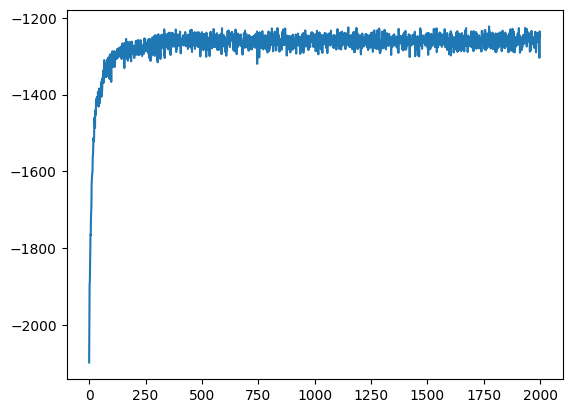

In [ ]:
plt.plot(scores)
plt.show()

## Spam Detection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-30 16:21:56--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-06-30 16:21:56 (11.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') # We pass in the encoding because now a days there are certain characters which might be invalid like emojis, therefore this encoding tackles them (removes them)
df.head()
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

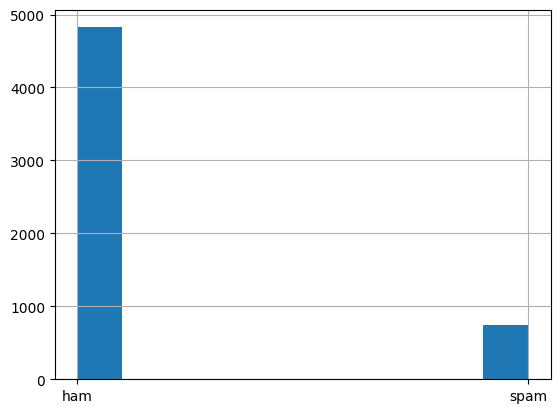

In [ ]:
df['labels'].hist() # Since the classes are imbalance, we will have to check other metrics besides accuracy like auc, f1, roc

In [ ]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)

In [ ]:
# try multiple ways of calculating features
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore') # Simply ignoring the non valid characters
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

Xtrain
# Xtest

<1839x7004 sparse matrix of type '<class 'numpy.int64'>'
	with 22365 stored elements in Compressed Sparse Row format>

In [ ]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.994374497723011
test acc: 0.988036976617727


In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

cm = confusion_matrix(Ytrain, Ptrain)
cm


train F1: 0.9792284866468843
test F1: 0.9523809523809524
train AUC: 0.9919183807559636
test AUC: 0.9836464967314065


array([[3217,    6],
       [  15,  495]])

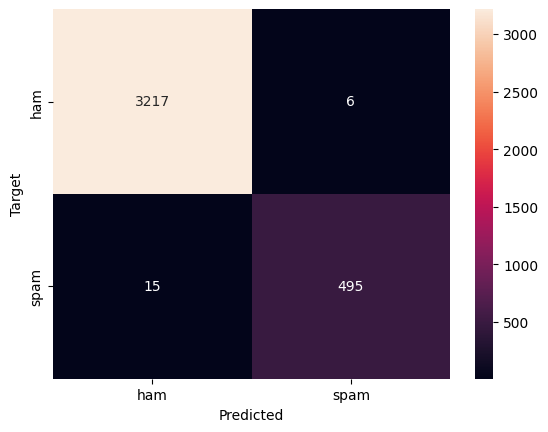

In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

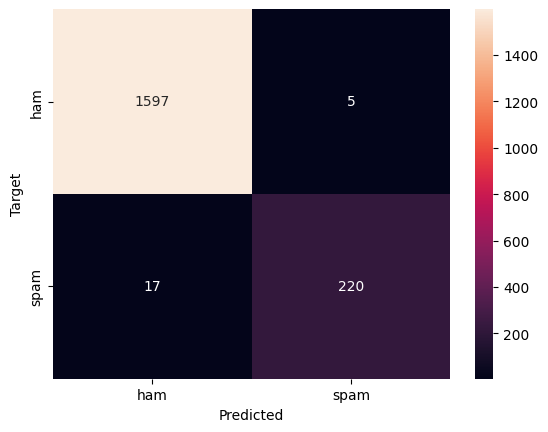

In [ ]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

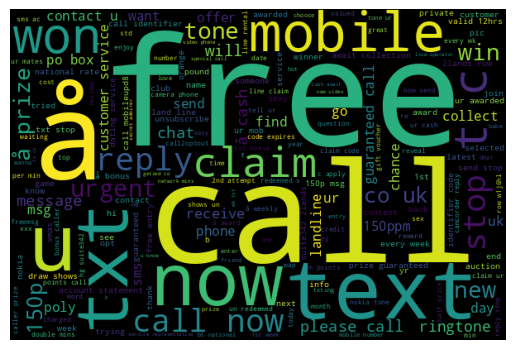

In [ ]:
# visualize the data
def visualize(label): # Most common words in the spammed mesagges, most common words will be larger
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
visualize('spam')

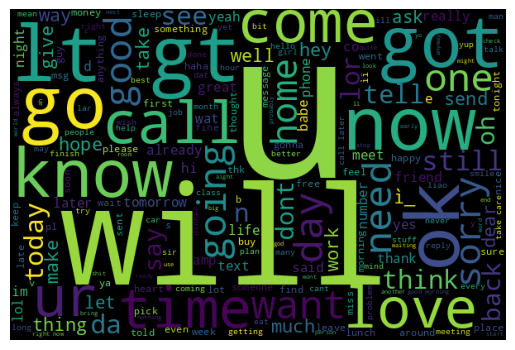

In [ ]:
visualize('ham')

In [ ]:
# see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
Would

In [ ]:
# things that should not be spam
# perhaps some are mislabeled?
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


## Sentiment Analysis

In [ ]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

In [ ]:
df = df_[['airline_sentiment', 'text']].copy()
df.head()

In [ ]:
df['airline_sentiment'].hist() # If imbalance class, look at parameters like auc and F1 score

In [ ]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

In [ ]:
df_train, df_test = train_test_split(df)
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000) # Limit vocabulary size to 2000
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [ ]:
Pr_train = model.predict_proba(X_train)#[:, 1] # We would have used this [:, 1] if this was a binary classification.
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9430974046358331
Test AUC: 0.8953986730393367


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm


array([[0.96500653, 0.00813126, 0.0268622 ],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30193548, 0.0516129 , 0.64645161]])

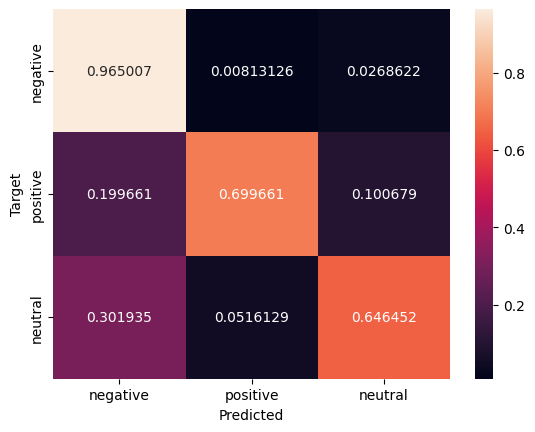

In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

# You can see that model works bad with positive an neutral class and often mistakes it with negative class

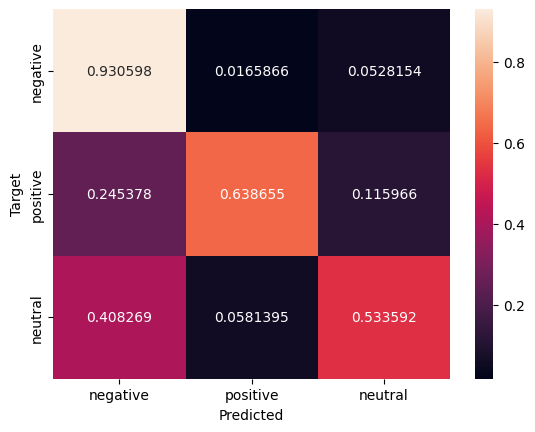

In [ ]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

### Binary Labels & Model Interpretation

In [ ]:
binary_target_list = [target_map['positive'], target_map['negative']] # Just a way to remove the neutral class
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [ ]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

# Model performs a lot better

Train acc: 0.9300982091276718
Test acc: 0.9147609147609148


In [ ]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292087


In [ ]:
model.coef_ # Returns the weights of our model

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

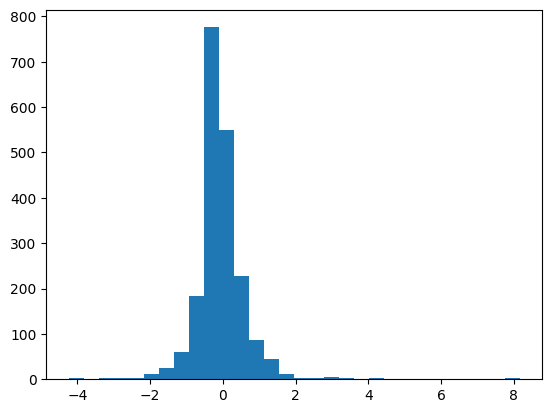

In [ ]:
plt.hist(model.coef_[0], bins=30);

# Most of the weights are centered around zero

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

In [ ]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

# This function simply returns the words with the highest weights and therefore the words with the highest influence. We are here printing words with weight > 2

Most positive words:
southwestair 2.8600756648514896
thank 8.070503978248222
great 5.208733897349233
best 3.6368642825162376
virginamerica 3.2284047967676655
thx 2.8083250879539405
jetblue 3.0216163024696443
good 3.2615369143995414
thanks 8.157945495533742
love 4.405152711235801
appreciate 2.9299264511255165
awesome 4.054714104270301
cool 2.0881519343377453
kudos 2.6141836318018443
amazing 4.194647955637536
worries 2.7116513040907093
wonderful 2.120412437675065


In [ ]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

# Simply putting threshold = -2 to get the most negatively influenced words

Most negative words:
hours -3.18012017285193
not -4.237871165123158
delayed -2.7045270959858145
hour -2.0696846300803164
but -2.221048457962789
cancelled -2.6770621928562077
nothing -2.0768244801835
what -2.014376186186617
no -3.970836170661347
worst -3.190035509681828
hold -2.790231540672249
why -2.22698798939604
luggage -2.162544497774524


## Text Summarization (by me)

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-07-03 09:00:08--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  6.96MB/s    in 0.7s    

2023-07-03 09:00:09 (6.96 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
import pandas as pd
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_ = pd.read_csv('bbc_text_cls.csv')
df = df_['text']
document = df[0] # Choose any document randomly
# print(document)

sentences = nltk.sent_tokenize(document) # Converting document into sentences
sentences

['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.',
 'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.',
 'Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
 'Time Warner said on Friday that it now owns 8% of search-engine Google.',
 'But its own internet business, AOL, had has mixed fortunes.',
 'It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.',
 "However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.",
 "It hopes to increase subscribers by offering the online service free to TimeWarner internet cus

In [ ]:
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(sentences) # A sparse matrix with rows containing sentences and columns containing vocabulary

score_list = []

for row in range(tfidf.shape[0]):
  score = 0
  word_count = 0 # The number of non zero words (to take average)

  for column in range(tfidf.shape[1]):

    element = tfidf[row,column]
    if element !=0:
      score += element
      word_count += 1

  score_list.append(score/word_count)

indices = np.argsort(-np.array(score_list)) # Indices of the list in descending order
indices

array([ 5, 10,  2,  4,  6, 19,  7, 16, 14, 15,  3, 17,  1, 12,  9, 13,  0,
        8, 18, 11])

In [ ]:
# Return the top 5 sentences in the document

summary = []

for i in indices[0:5]: # Appending the top 5 documents with the highest tfidf average
  summary.append(sentences[i])


output = " ".join(summary)

print("Summary: ")
print(textwrap.fill(output))

Summary: 
But its own internet business, AOL, had has mixed fortunes. Time
Warner's fourth quarter profits were slightly better than analysts'
expectations. TimeWarner said fourth quarter sales rose 2% to $11.1bn
from $10.9bn. Time Warner said on Friday that it now owns 8% of
search-engine Google. It lost 464,000 subscribers in the fourth
quarter profits were lower than in the preceding three quarters.


## Text Summariation (Instructor)

In [ ]:
import pandas as pd
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

df = pd.read_csv('bbc_text_cls.csv')
df.head()

In [ ]:
doc = df[df.labels == 'business']['text'].sample(random_state=42)
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)
print(wrap(doc.iloc[0]))

In [ ]:
# df_ = pd.read_csv('bbc_text_cls.csv')
# df = df_['text']
# doc = df.iloc[0]
# doc

In [ ]:
sents = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])
featurizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    norm='l1',
)
X = featurizer.fit_transform(sents)
def get_sentence_score(tfidf_row):
  # return the average of the non-zero values
  # of the tf-idf vector representation of a sentence
  x = tfidf_row[tfidf_row != 0]
  return x.mean()
scores = np.zeros(len(sents))
for i in range(len(sents)):
  score = get_sentence_score(X[i,:])
  scores[i] = score

In [ ]:
sort_idx = np.argsort(-scores)
# Many options for how to choose which sentences to include:

# 1) top N sentences
# 2) top N words or characters.
# 3) top X% sentences or top X% words
# 4) sentences with scores > average score
# 5) sentences with scores > factor * average score

# You also don't have to sort. May make more sense in order.

print("Generated summary:")
for i in sort_idx[:5]:
  print(wrap("%.2f: %s" % (scores[i], sents[i])))

Generated summary:
0.14: A number of retailers have already reported poor figures for
December.
0.13: However, reports from some High Street retailers highlight the
weakness of the sector.
0.12: The ONS revised the annual 2004 rate of growth down from the
5.9% estimated in November to 3.2%.
0.10: "Our view is the Bank of England will keep its powder dry and
wait to see the big picture."
0.10: And a British Retail Consortium survey found that Christmas 2004
was the worst for 10 years.


In [ ]:
doc.iloc[0].split("\n", 1)[0]

'Christmas sales worst since 1981'

In [ ]:
def summarize(text):
  # extract sentences
  sents = nltk.sent_tokenize(text)

  # perform tf-idf
  X = featurizer.fit_transform(sents)

  # compute scores for each sentence
  scores = np.zeros(len(sents))
  for i in range(len(sents)):
    score = get_sentence_score(X[i,:])
    scores[i] = score

  # sort the scores
  sort_idx = np.argsort(-scores)

  # print summary
  for i in sort_idx[:5]:
    print(wrap("%.2f: %s" % (scores[i], sents[i])))

doc = df[df.labels == 'entertainment']['text'].sample(random_state=123)
summarize(doc.iloc[0].split("\n", 1)[1])

0.11: The Black Eyed Peas won awards for best R 'n' B video and
sexiest video, both for Hey Mama.
0.10: The ceremony was held at the Luna Park fairground in Sydney
Harbour and was hosted by the Osbourne family.
0.10: Goodrem, Green Day and the Black Eyed Peas took home two awards
each.
0.10: Other winners included Green Day, voted best group, and the
Black Eyed Peas.
0.10: The VH1 First Music Award went to Cher honouring her
achievements within the music industry.


## Test Rank for Summarization

### Check video for explanation (this section is bit advanced/confusing and also not very important)

In [ ]:
import pandas as pd
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

df = pd.read_csv('bbc_text_cls.csv')

doc = df[df.labels == 'business']['text'].sample(random_state=42)
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)
print(wrap(doc.iloc[0]))

# print(doc.iloc[0].split("\n", 1)[1])

In [ ]:
sents = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])
featurizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    norm='l1')
X = featurizer.fit_transform(sents)

In [ ]:
# compute similarity matrix
S = cosine_similarity(X)
# S.shape

# len(sents)

# normalize similarity matrix
S /= S.sum(axis=1, keepdims=True)
# S[0].sum()

In [ ]:
# uniform transition matrix
U = np.ones_like(S) / len(S)
U[0].sum()

# smoothed similarity matrix
factor = 0.15
S = (1 - factor) * S + factor * U
S[0].sum()

1.0

In [ ]:
# find the limiting / stationary distribution
eigenvals, eigenvecs = np.linalg.eig(S.T)
eigenvals

array([1.        , 0.24245466, 0.72108199, 0.67644122, 0.34790129,
       0.34417302, 0.3866884 , 0.40333562, 0.41608572, 0.44238593,
       0.63909999, 0.62556792, 0.58922572, 0.57452382, 0.48511399,
       0.51329157, 0.52975372])

In [ ]:
eigenvecs[:,0]

array([-0.24206557, -0.27051337, -0.2213806 , -0.28613638, -0.25065894,
       -0.2499217 , -0.279622  , -0.21515455, -0.2226665 , -0.22745415,
       -0.2059112 , -0.20959727, -0.23526242, -0.24203809, -0.23663025,
       -0.2940483 , -0.20865607])

In [ ]:
eigenvecs[:,0].dot(S)

eigenvecs[:,0] / eigenvecs[:,0].sum()

array([0.05907327, 0.06601563, 0.05402535, 0.06982824, 0.06117038,
       0.06099047, 0.06823848, 0.05250595, 0.05433915, 0.05550753,
       0.05025022, 0.05114976, 0.05741304, 0.05906657, 0.05774684,
       0.07175905, 0.05092007])

In [ ]:
limiting_dist = np.ones(len(S)) / len(S)
threshold = 1e-8
delta = float('inf')
iters = 0
while delta > threshold:
  iters += 1

  # Markov transition
  p = limiting_dist.dot(S)

  # compute change in limiting distribution
  delta = np.abs(p - limiting_dist).sum()

  # update limiting distribution
  limiting_dist = p

print(iters)

41


In [ ]:
limiting_dist

limiting_dist.sum()

np.abs(eigenvecs[:,0] / eigenvecs[:,0].sum() - limiting_dist).sum()

scores = limiting_dist
sort_idx = np.argsort(-scores)

In [ ]:
# Many options for how to choose which sentences to include:

# 1) top N sentences
# 2) top N words
# 3) top X% sentences or top X% words
# 4) sentences with scores > average score
# 5) sentences with scores > factor * average score

# You also don't have to sort. May make more sense in order.

print("Generated summary:")
for i in sort_idx[:5]:
  print(wrap("%.2f: %s" % (scores[i], sents[i])))

Generated summary:
0.07: "The retail sales figures are very weak, but as Bank of England
governor Mervyn King indicated last night, you don't really get an
accurate impression of Christmas trading until about Easter," said Mr
Shaw.
0.07: A number of retailers have already reported poor figures for
December.
0.07: The ONS echoed an earlier caution from Bank of England governor
Mervyn King not to read too much into the poor December figures.
0.07: Retail sales dropped by 1% on the month in December, after a
0.6% rise in November, the Office for National Statistics (ONS) said.
0.06: Clothing retailers and non-specialist stores were the worst hit
with only internet retailers showing any significant growth, according
to the ONS.


In [ ]:
def summarize(text, factor = 0.15):
  # extract sentences
  sents = nltk.sent_tokenize(text)

  # perform tf-idf
  featurizer = TfidfVectorizer(
      stop_words=stopwords.words('english'),
      norm='l1')
  X = featurizer.fit_transform(sents)

  # compute similarity matrix
  S = cosine_similarity(X)

  # normalize similarity matrix
  S /= S.sum(axis=1, keepdims=True)

  # uniform transition matrix
  U = np.ones_like(S) / len(S)

  # smoothed similarity matrix
  S = (1 - factor) * S + factor * U

  # find the limiting / stationary distribution
  eigenvals, eigenvecs = np.linalg.eig(S.T)

  # compute scores
  scores = eigenvecs[:,0] / eigenvecs[:,0].sum()

  # sort the scores
  sort_idx = np.argsort(-scores)

  # print summary
  for i in sort_idx[:5]:
    print(wrap("%.2f: %s" % (scores[i], sents[i])))

In [ ]:
doc = df[df.labels == 'entertainment']['text'].sample(random_state=123)
summarize(doc.iloc[0].split("\n", 1)[1])

0.11: Goodrem, Green Day and the Black Eyed Peas took home two awards
each.
0.10: As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
0.10: Other winners included Green Day, voted best group, and the
Black Eyed Peas.
0.10: The Black Eyed Peas won awards for best R 'n' B video and
sexiest video, both for Hey Mama.
0.10: Local singer and songwriter Missy Higgins took the title of
breakthrough artist of the year, with Australian Idol winner Guy
Sebastian taking the honours for best pop video.


## Libraries for Text Summarization (including test rank approach)

In [ ]:
!pip install sumy

In [ ]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

summarizer = TextRankSummarizer()

parser = PlaintextParser.from_string(
    doc.iloc[0].split("\n", 1)[1],
    Tokenizer("english"))
summary = summarizer(parser.document, sentences_count=5)

summary

(<Sentence: The 21-year-old singer won the award for best female artist, with Australian Idol runner-up Shannon Noll taking the title of best male at the ceremony.>,
 <Sentence: As well as best female, Goodrem also took home the Pepsi Viewers Choice Award, whilst Green Day bagged the prize for best rock video for American Idiot.>,
 <Sentence: The Black Eyed Peas won awards for best R 'n' B video and sexiest video, both for Hey Mama.>,
 <Sentence: Local singer and songwriter Missy Higgins took the title of breakthrough artist of the year, with Australian Idol winner Guy Sebastian taking the honours for best pop video.>,
 <Sentence: The ceremony was held at the Luna Park fairground in Sydney Harbour and was hosted by the Osbourne family.>)

In [ ]:
for s in summary:
  print(wrap(str(s)))

The 21-year-old singer won the award for best female artist, with
Australian Idol runner-up Shannon Noll taking the title of best male
at the ceremony.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
The Black Eyed Peas won awards for best R 'n' B video and sexiest
video, both for Hey Mama.
Local singer and songwriter Missy Higgins took the title of
breakthrough artist of the year, with Australian Idol winner Guy
Sebastian taking the honours for best pop video.
The ceremony was held at the Luna Park fairground in Sydney Harbour
and was hosted by the Osbourne family.


In [ ]:
summarizer = LsaSummarizer()
summary = summarizer(parser.document, sentences_count=5)
for s in summary:
  print(wrap(str(s)))

Goodrem, known in both Britain and Australia for her role as Nina
Tucker in TV soap Neighbours, also performed a duet with boyfriend
Brian McFadden.
Other winners included Green Day, voted best group, and the Black Eyed
Peas.
Goodrem, Green Day and the Black Eyed Peas took home two awards each.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
Artists including Carmen Electra, Missy Higgins, Kelly Osbourne, Green
Day, Ja Rule and Natalie Imbruglia gave live performances at the
event.


In [ ]:
# https://radimrehurek.com/gensim_3.8.3/summarization/summariser.html
# https://arxiv.org/abs/1602.03606
# Parameters
# text (str) – Given text.
# ratio (float, optional) – Number between 0 and 1 that determines the
#     proportion of the number of sentences of the original text to be
#     chosen for the summary.
# word_count (int or None, optional) – Determines how many words will the
#     output contain. If both parameters are provided, the ratio will be
#     ignored.
# split (bool, optional) – If True, list of sentences will be returned.
#     Otherwise joined strings will bwe returned.
from gensim.summarization.summarizer import summarize
summary = summarize(doc.iloc[0].split("\n", 1)[1])
print(wrap(summary))

## LDA Topic Modeling

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('stopwords')

stops = set(stopwords.words('english')) # Some stop wors are additionaly added by observing the dataset
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year',
})
stops = list(stops) # required for later version of CountVectorizer
df = pd.read_csv('bbc_text_cls.csv')
df.head()

--2023-07-04 20:07:37--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  4.60MB/s    in 1.1s    

2023-07-04 20:07:38 (4.60 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
vectorizer = CountVectorizer(stop_words=stops)
X = vectorizer.fit_transform(df['text'])
# Note: you could potentially split the data into train and test
# and evaluate the model using the log-likelihood or perplexity
# on out-of-sample data
lda = LatentDirichletAllocation( # n_components defines the number of topics we want the model to make
    n_components=10, # default: 10
    random_state=12345,
)
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [ ]:
def plot_top_words(model, feature_names, n_top_words=10): # No need to go through this code, it is copied and basically just creates a chart of top 10 words in each topic
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

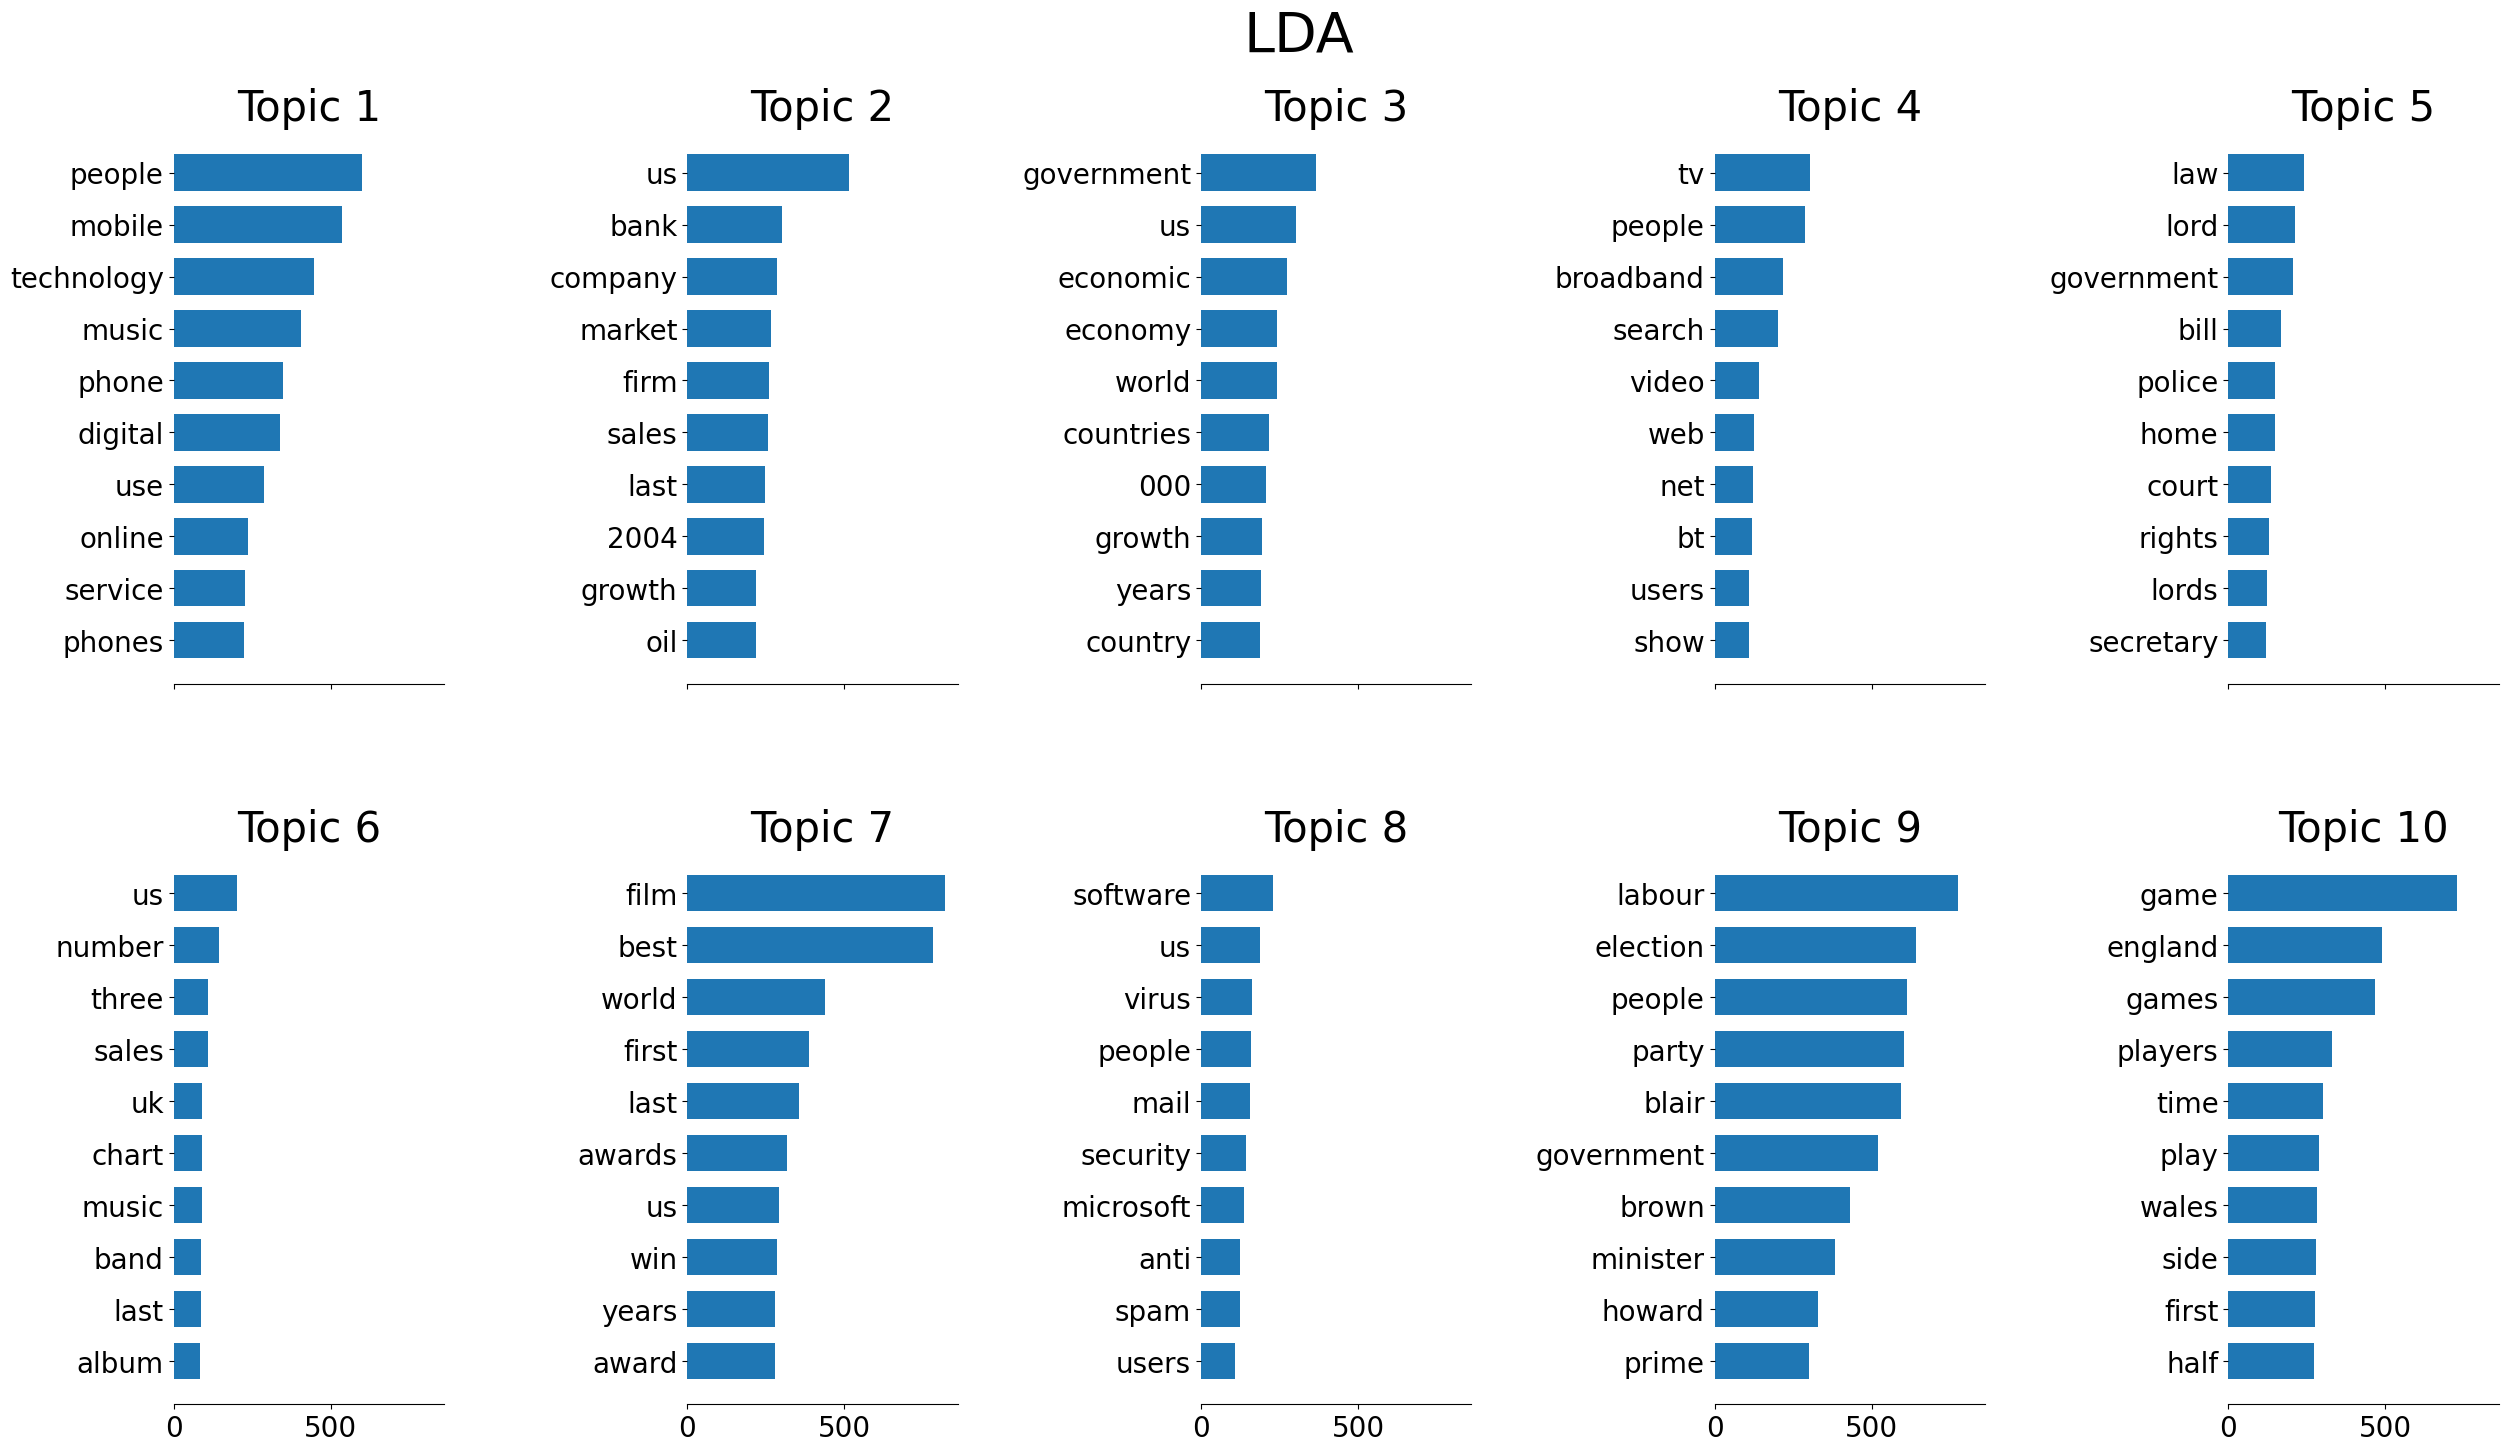

In [ ]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);

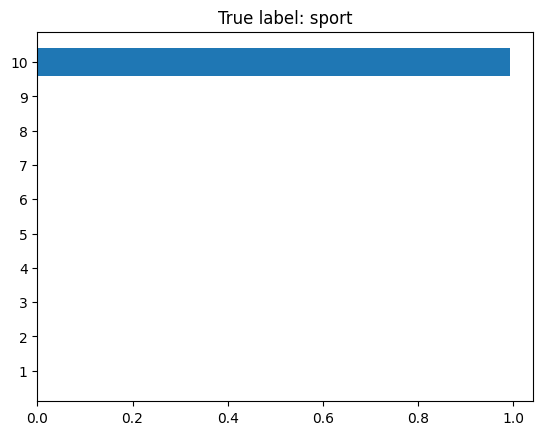

In [ ]:
Z = lda.transform(X)
# Pick a random document
# Check which "topics" are associated with it
# Are they related to the true label?

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1 # [0 1 2 3 4 5 6 7 8 9] + 1 = [ 1  2  3  4  5  6  7  8  9 10]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

In [ ]:
def wrap(x): # Confirming by printing the actual document
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

Text(0.5, 1.0, 'True label: entertainment')

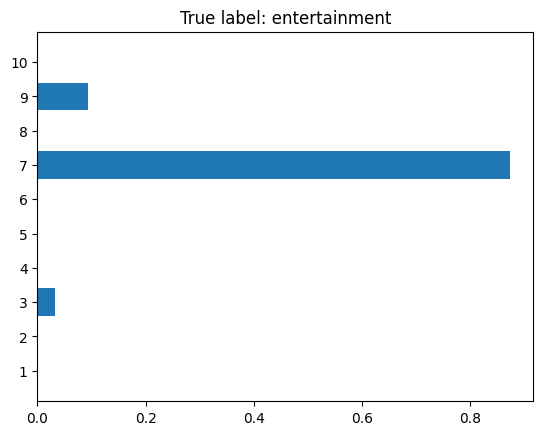

In [ ]:
i = np.random.choice(len(df))
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [ ]:
print(wrap(df.iloc[i]['text']))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20

## Topic Modeling using NNMF

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
nltk.download('stopwords')

stops = set(stopwords.words('english'))
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year',
})
stops = list(stops) # required for later version of CountVectorizer

df = pd.read_csv('bbc_text_cls.csv')
df.head()

File ‘bbc_text_cls.csv’ already there; not retrieving.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
vectorizer = TfidfVectorizer(stop_words=stops)
X = vectorizer.fit_transform(df['text'])
# Note: you could potentially split the data into train and test
# and evaluate the model using the log-likelihood or perplexity
# on out-of-sample data
nmf = NMF(
    n_components=10, # default: 10
    beta_loss="kullback-leibler",
    solver='mu',
    # alpha_W=0.1,
    # alpha_H=0.1,
    # l1_ratio=0.5,
    random_state=0,
)
nmf.fit(X)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

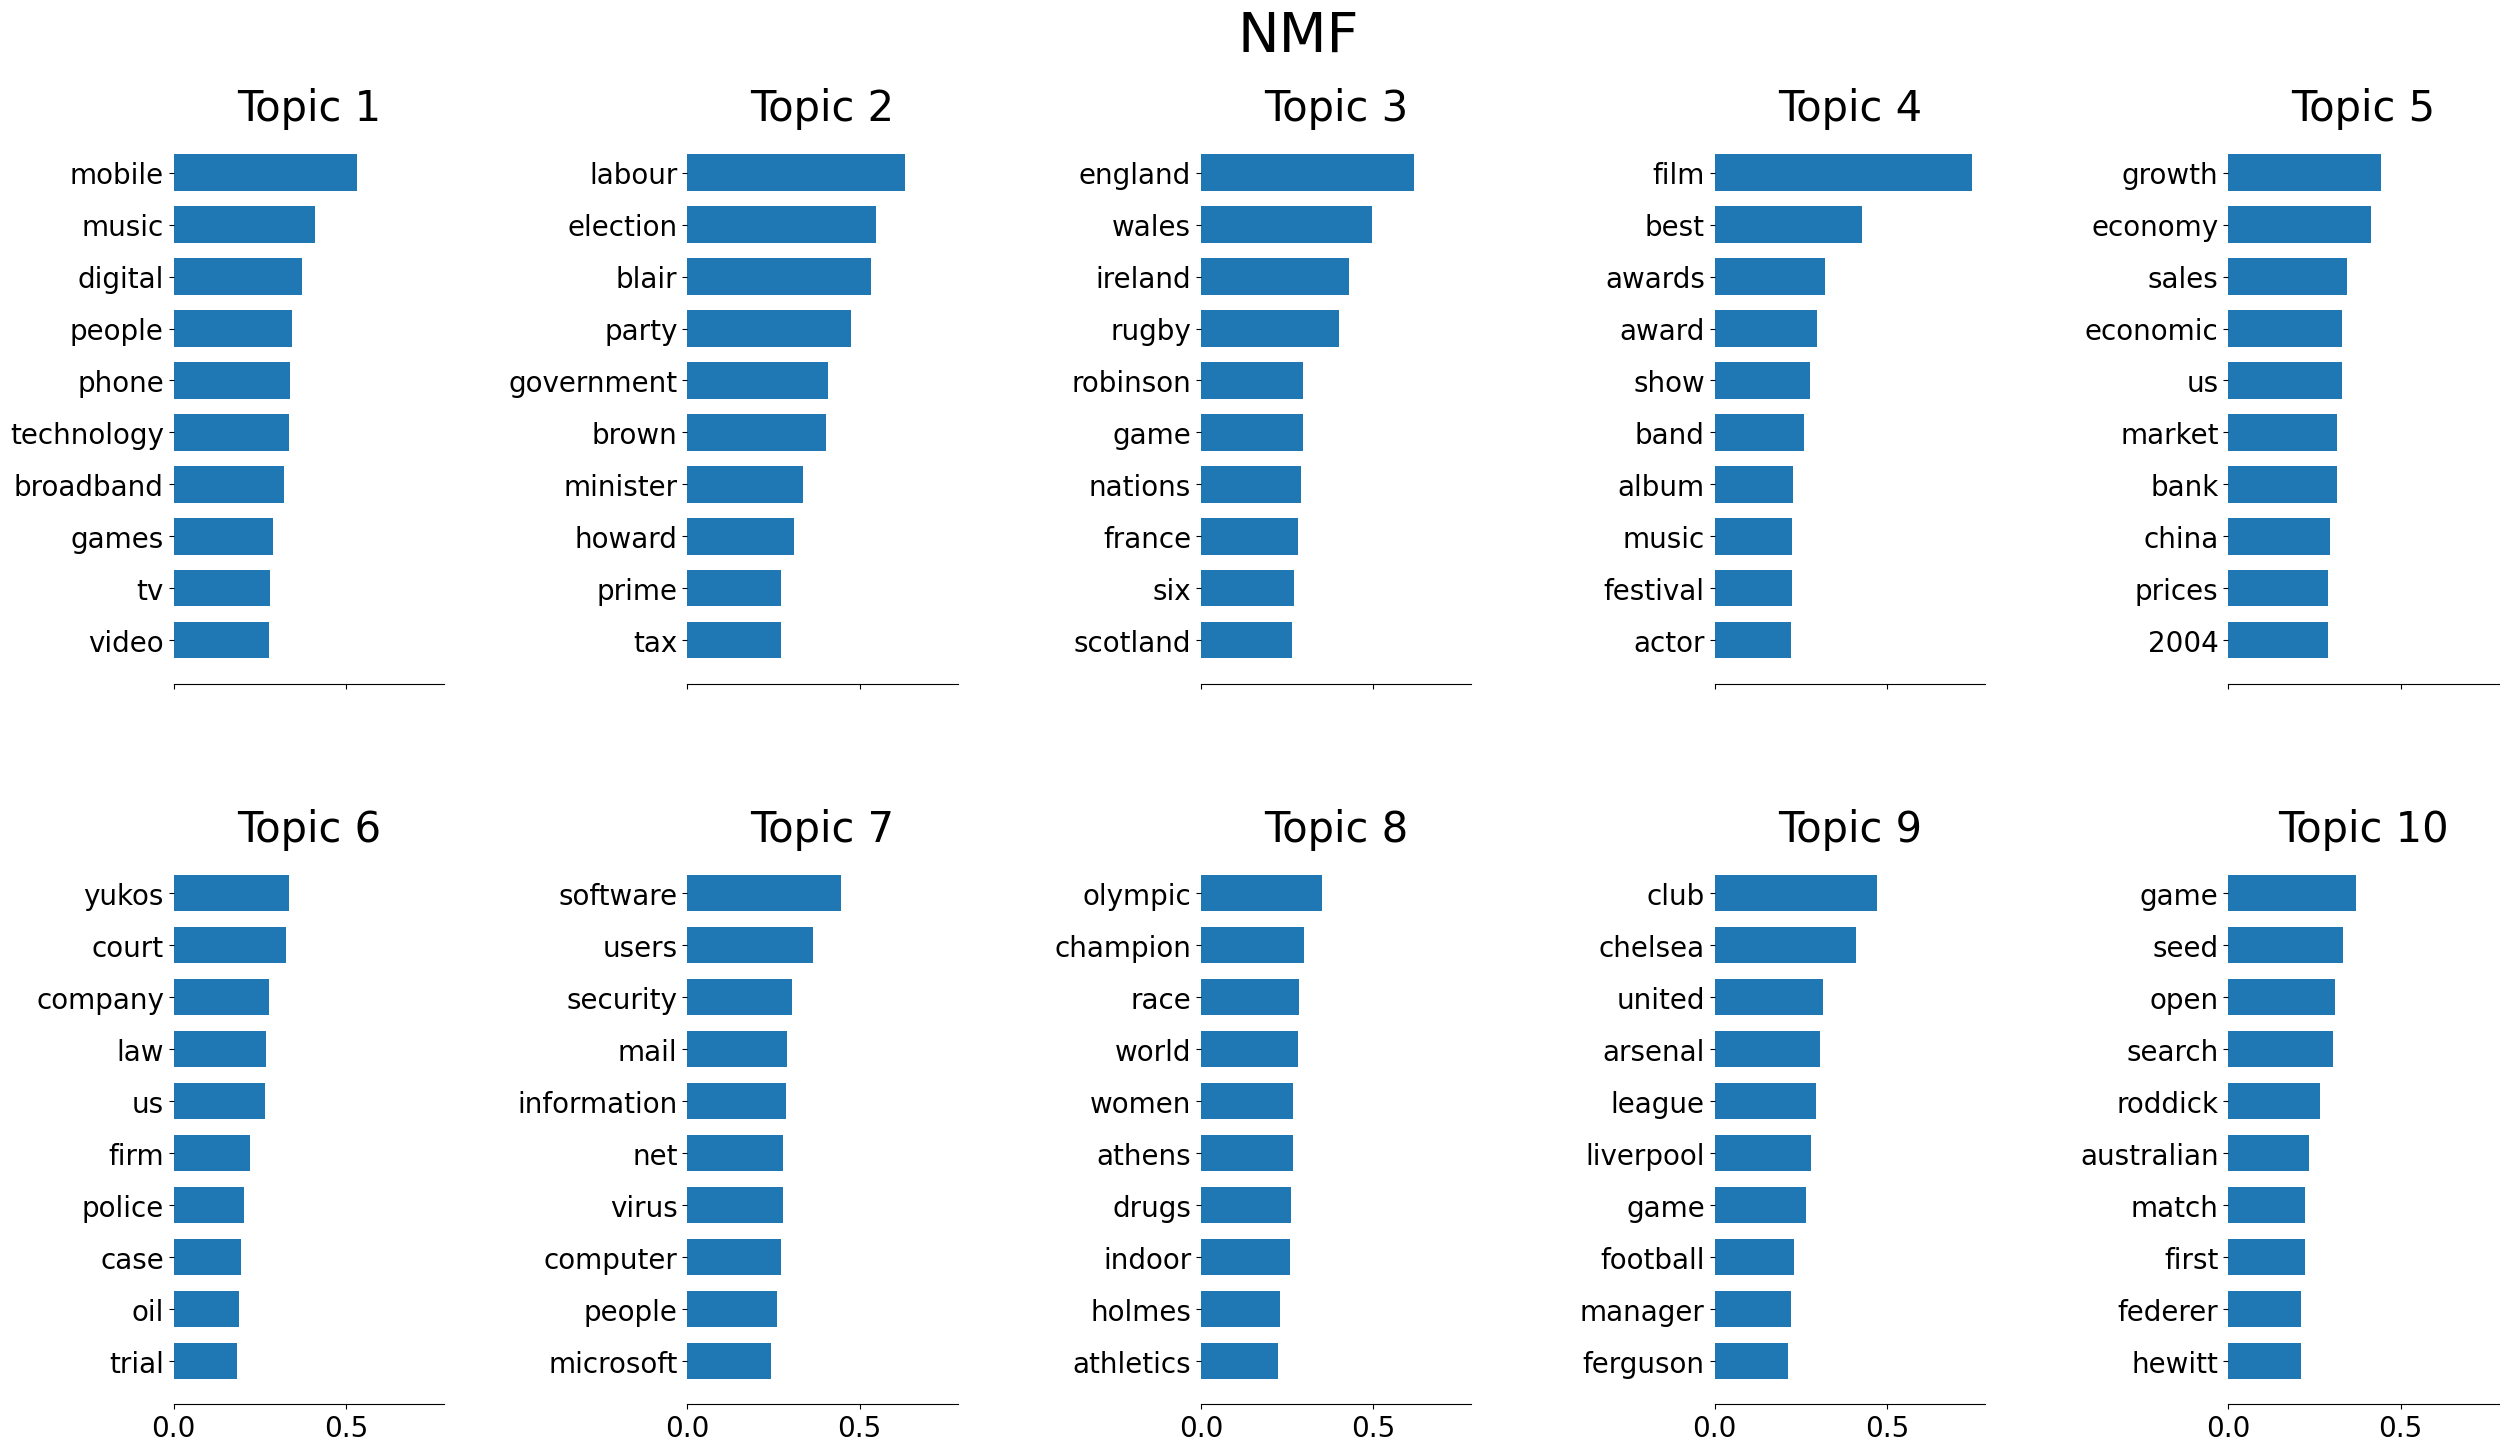

In [ ]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, feature_names);

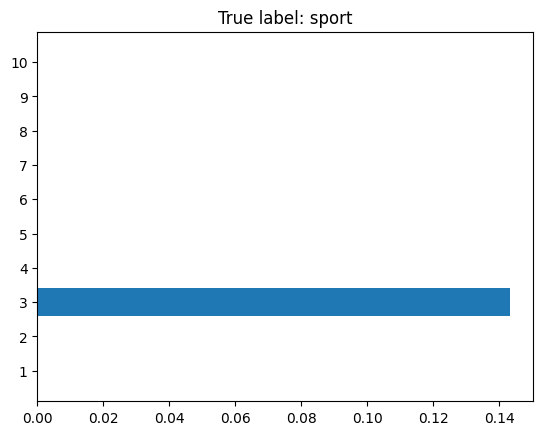

In [ ]:
Z = nmf.transform(X)
# Pick a random document
# Check which "topics" are associated with it
# Are they related to the true label?

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels']);

In [ ]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

## Latent Semantic Analysis

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt

# Open the file in read mode
file_path = 'all_book_titles.txt'  # Replace with the actual file path
with open(file_path, 'r') as file:
    # Read the contents of the file
    file_contents = file.read()
    print(file_contents)

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('all_book_titles.txt')]

stops = set(stopwords.words('english'))
# great example of domain-specific stopwords
stops = stops.union({
  'introduction', 'edition', 'series', 'application',
  'approach', 'card', 'access', 'package', 'plus', 'etext',
  'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
  'third', 'second', 'fourth', 'volume'})

# stops = list(stops)

In [ ]:
def my_tokenizer(s):
  # downcase
  s = s.lower()

  # split string into words (tokens)
  tokens = nltk.tokenize.word_tokenize(s)

  # remove short words, they're probably not useful
  tokens = [t for t in tokens if len(t) > 2]

  # put words into base form
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  # remove stopwords
  tokens = [t for t in tokens if t not in stops]

  # remove any digits, i.e. "3rd edition"
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

  return tokens

In [ ]:
vectorizer = CountVectorizer(binary=True, tokenizer=my_tokenizer) # Binary will not store the count, just 0 and 1 indicating if the term was in document or not

X = vectorizer.fit_transform(titles)
# create index > word map for plotting later

# conceptually what we want to do
# index_word_map = [None] * len(vectorizer.vocabulary_)
# for word, index in vectorizer.vocabulary_.items():
#   index_word_map[index] = word

# but it's already stored in the count vectorizer
index_word_map = vectorizer.get_feature_names_out()

In [ ]:
# transpose X to make rows = terms, cols = documents
X = X.T # Transposing the matrix because we want term*document matrix

svd = TruncatedSVD()
Z = svd.fit_transform(X)

In [ ]:
!pip install plotly

import plotly.express as px

fig = px.scatter(x=Z[:,0], y=Z[:,1], text=index_word_map, size_max=60) # You can see that it basically has form two sides, one is computer and science, other is history and arts, which is two different sides of college offerings.
fig.update_traces(textposition='top center')
fig.show()

## Linear regression using Tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers


from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

N = 100
X = np.random.random(N) * 6 - 3 # Generating 100 random data points from -3 to 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5 # A line which will be the actual relation, we have added some noice to it

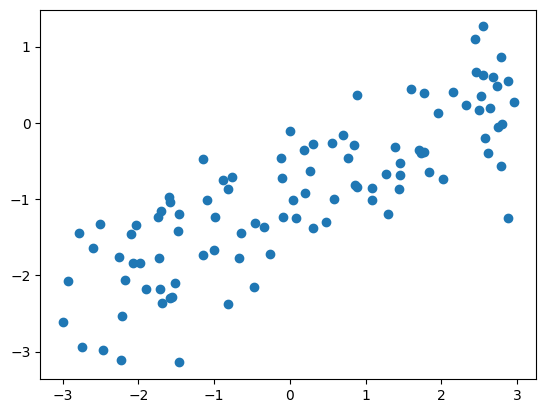

In [ ]:
plt.scatter(X, y);

In [ ]:
# build model
i = Input(shape=(1,)) # 1 because 1 is the dimension of the data set
x = Dense(1)(i) # This is the output, it basically forms our mx+b type function and gives 1 output (thats why dense(1))

model = Model(i, x)

In [ ]:
model.summary() # None in parenthesis means that we can use as many number of samples as we want. Dense layer has 2 parameters which are the slope and the intercept

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  loss='mse', # Loss function is mean square error
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.1),
  metrics=['mae'] # Just another metric we want to visualize
)

In [ ]:
r = model.fit(
  X.reshape(-1, 1), y, # -1 again is same as None, meaning as many input as we want, 1 is the dimension of the data
  epochs=200,
  batch_size=32,
)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 2.1715 - mae: 1.1977
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7676 - mae: 0.6794
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3606 - mae: 0.4922
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4015 - mae: 0.5135
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4579 - mae: 0.5374
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4148 - mae: 0.5154
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3404 - mae: 0.4740
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3287 - mae: 0.4681
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3580 - mae: 0.4848
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3662 - mae: 0.4881
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3496 

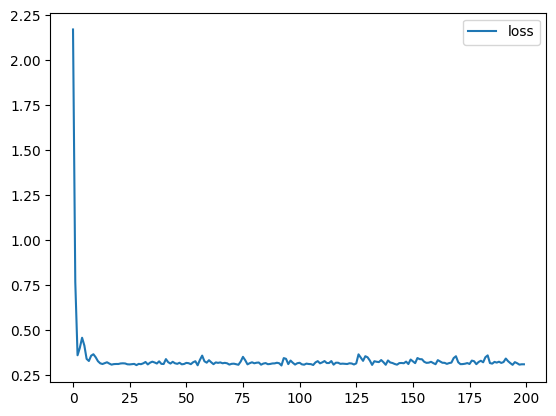

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend();

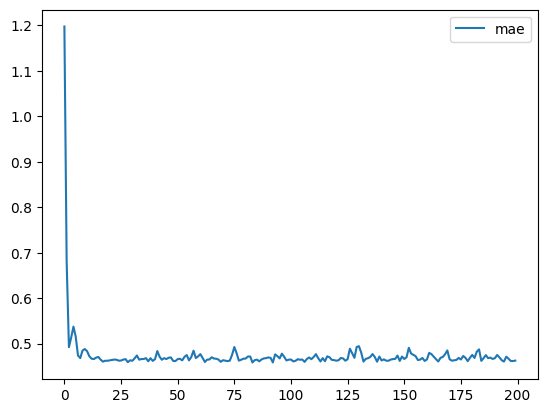

In [ ]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend();

In [ ]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 36ms/step


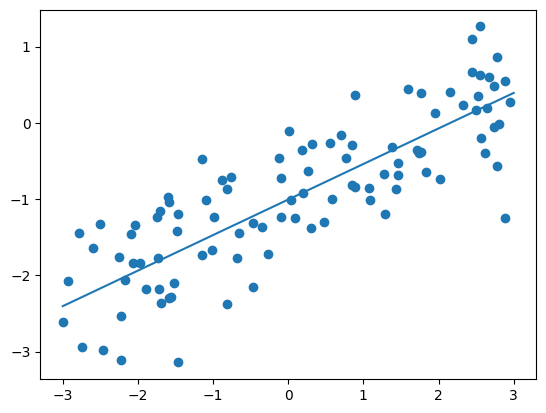

In [ ]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [ ]:
# Check the learned parameters
model.layers

In [ ]:
model.layers[1].get_weights() # 0.5 and -1

[array([[0.466201]], dtype=float32), array([-1.0058991], dtype=float32)]

## Spam Detection using Tensorflow

In [ ]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy # If this shows an error, just on top click on runtime and restart runtime
from tensorflow.keras.optimizers import Adam

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('AirlineTweets.csv')
df.head()

In [ ]:
df = df[['airline_sentiment', 'text']]
df['airline_sentiment'].hist()

In [ ]:
df = df[df['airline_sentiment'] != 'neutral'].copy()
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
df_train, df_test = train_test_split(df, random_state=42)

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
# input dimensions
D = X_train.shape[1] # Number of terms/vocabulary, which is the dimensionality if the data
X_train.shape

(8655, 2000)

In [ ]:
# build model
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss

model = Model(i, x)
model.summary() # 1 bias term is added so 2001

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
  loss=BinaryCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy']
)
r = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs=40,
  batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 1s 5ms/step - loss: 0.5030 - accuracy: 0.7920 - val_loss: 0.3973 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.7964 - val_loss: 0.3393 - val_accuracy: 0.8202
Epoch 3/40
68/68 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8183 - val_loss: 0.3027 - val_accuracy: 0.8423
Epoch 4/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.8451 - val_loss: 0.2768 - val_accuracy: 0.8597
Epoch 5/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8639 - val_loss: 0.2582 - val_accuracy: 0.8777
Epoch 6/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.8810 - val_loss: 0.2444 - val_accuracy: 0.8888
Epoch 7/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.8927 - val_loss: 0.2336 - val_accuracy: 0.9009
Epoch 8/40
68/68 [==

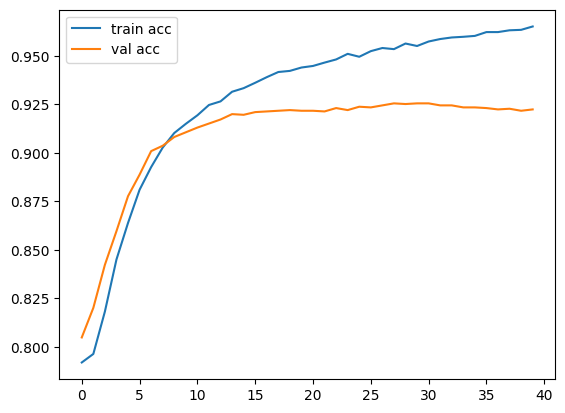

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

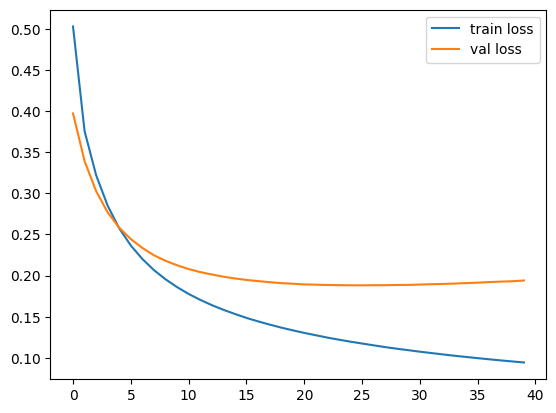

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();  # As you can see the loss on validation/test set increases back during the end, this can be because of overfitting. We can fix this by using recall function which can simply store the best model in the epochs

In [ ]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten() # Since now it returns logs, we check if value is > 0 or not to get true anf false (log 1 = 0)
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

print(P_train)

91/91 [==============================] - 0s 2ms/step
[1. 0. 1. ... 1. 0. 0.]


In [ ]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.99095551, 0.00904449],
       [0.09833333, 0.90166667]])

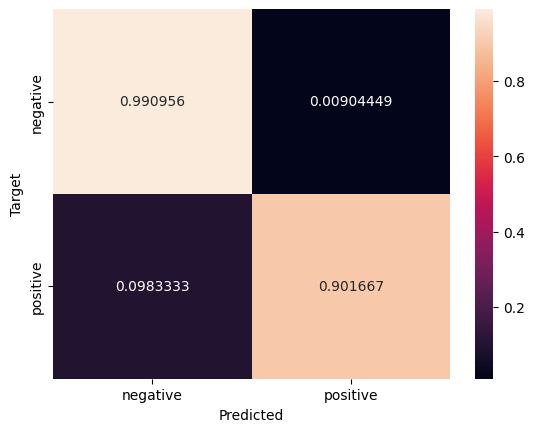

In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

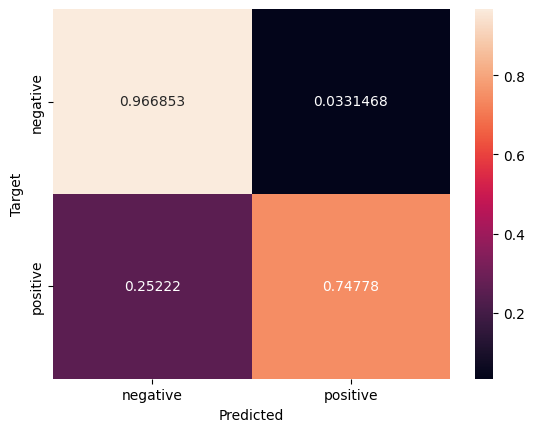

In [ ]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [ ]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))


91/91 [==============================] - 0s 922us/step
Train AUC: 0.9950018640084285
Test AUC: 0.9547608324814257


In [ ]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.9314203730272597
Test F1: 0.7935909519321396


In [ ]:
model.layers

model.layers[1].get_weights()

[array([[-3.760275 ],
        [ 3.28303  ],
        [-1.5790721],
        ...,
        [ 2.0355146],
        [ 1.637897 ],
        [-2.9086726]], dtype=float32),
 array([-0.24412951], dtype=float32)]

In [ ]:
w = model.layers[1].get_weights()[0] # Removing bias
w

array([[-3.760275 ],
       [ 3.28303  ],
       [-1.5790721],
       ...,
       [ 2.0355146],
       [ 1.637897 ],
       [-2.9086726]], dtype=float32)

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

In [ ]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
thank 9.693654
thanks 9.367359
worries 8.423892
great 7.940876
awesome 7.379707
love 7.2455945
excellent 7.073425
kudos 6.7209387
amazing 6.4833965
best 6.1135106


In [ ]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most negative words:
worst -9.321854
paid -7.7911487
not -7.6307945
rude -7.6253076
disappointed -7.214743
nothing -6.833509
website -6.8311677
hung -6.6342907
instead -6.579811
list -6.257953


## Text Classification using ANN and Tensorflow

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-07-08 20:02:03--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.46MB/s    in 0.9s    

2023-07-08 20:02:04 (5.46 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
# map classes to integers from 0...K-1
df['labels'].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [ ]:
df['targets'] = df['labels'].astype("category").cat.codes

df_train, df_test = train_test_split(df, test_size=0.3)

tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

Ytrain = df_train['targets']
Ytest = df_test['targets']

# number of classes
K = df['targets'].max() + 1
K

5

In [ ]:
# input dimensions
D = Xtrain.shape[1]
# build model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss

model = Model(i, x)

# Model has 1 input layer i and then 1 hidden layer with 300 neurons and relu activation function and then another hidden layer which is also the final layer,  with K neurons, where K is the total number of classes

In [ ]:
model.summary() # The model has learned 7548600 different parameters

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25161)]           0         
                                                                 
 dense_2 (Dense)             (None, 300)               7548600   
                                                                 
 dense_3 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,550,105
Trainable params: 7,550,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()
r = model.fit(
  Xtrain, Ytrain,
  validation_data=(Xtest, Ytest),
  epochs=7,
  batch_size=128,
)

Epoch 1/7
13/13 [==============================] - 9s 574ms/step - loss: 1.4614 - accuracy: 0.8465 - val_loss: 1.1774 - val_accuracy: 0.9731
Epoch 2/7
13/13 [==============================] - 6s 415ms/step - loss: 0.9013 - accuracy: 0.9897 - val_loss: 0.7073 - val_accuracy: 0.9790
Epoch 3/7
13/13 [==============================] - 4s 293ms/step - loss: 0.4356 - accuracy: 0.9968 - val_loss: 0.3943 - val_accuracy: 0.9790
Epoch 4/7
13/13 [==============================] - 6s 450ms/step - loss: 0.1913 - accuracy: 0.9968 - val_loss: 0.2445 - val_accuracy: 0.9805
Epoch 5/7
13/13 [==============================] - 5s 410ms/step - loss: 0.0924 - accuracy: 0.9987 - val_loss: 0.1784 - val_accuracy: 0.9820
Epoch 6/7
13/13 [==============================] - 7s 521ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9820
Epoch 7/7
13/13 [==============================] - 5s 353ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9820


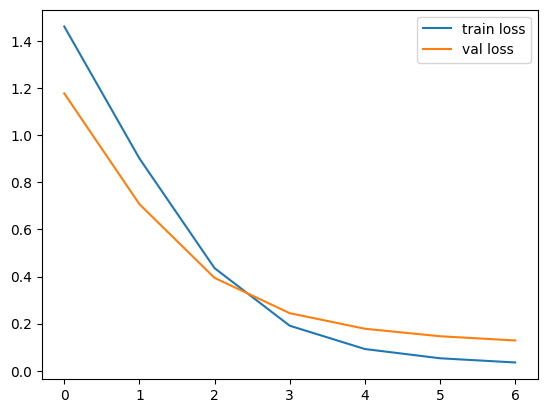

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

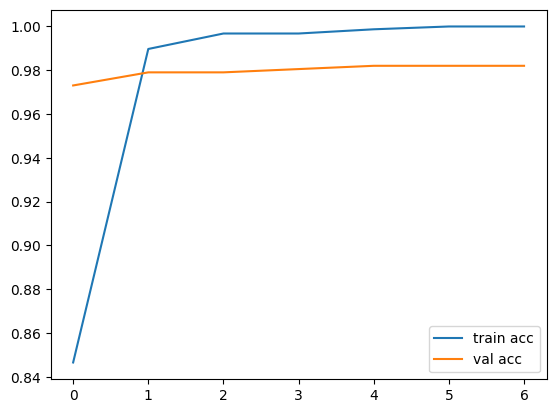

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

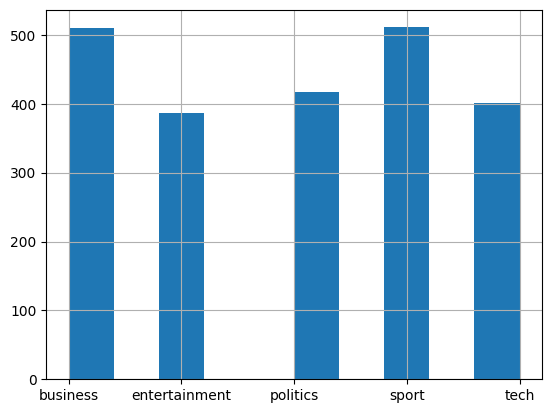

In [ ]:
df['labels'].hist()

## CNN Text Classification

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

--2023-07-11 01:32:31--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  6.17MB/s    in 0.8s    

2023-07-11 01:32:32 (6.17 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
df = pd.read_csv('bbc_text_cls.csv')

df['targets'] = df['labels'].astype("category").cat.codes

# number of classes
K = df['targets'].max() + 1
K

5

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3)
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

df_train.shape

1557

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 27545 unique tokens.


In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 2837)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 2837)


In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 50

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=50,
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/50
49/49 [==============================] - 22s 396ms/step - loss: 1.6070 - accuracy: 0.2081 - val_loss: 1.6038 - val_accuracy: 0.2335
Epoch 2/50
49/49 [==============================] - 15s 314ms/step - loss: 1.5756 - accuracy: 0.2717 - val_loss: 1.6035 - val_accuracy: 0.2320
Epoch 3/50
49/49 [==============================] - 11s 220ms/step - loss: 1.5482 - accuracy: 0.2820 - val_loss: 1.6062 - val_accuracy: 0.2246
Epoch 4/50
49/49 [==============================] - 10s 215ms/step - loss: 1.5123 - accuracy: 0.3706 - val_loss: 1.6084 - val_accuracy: 0.2216
Epoch 5/50
49/49 [==============================] - 11s 223ms/step - loss: 1.4636 - accuracy: 0.5780 - val_loss: 1.6102 - val_accuracy: 0.2066
Epoch 6/50
49/49 [==============================] - 10s 213ms/step - loss: 1.3969 - accuracy: 0.6936 - val_loss: 1.6156 - val_accuracy: 0.2141
Epoch 7/50
49/49 [==============================] - 9s 189ms/step - loss: 1.3106 - accuracy: 0.7367 - val_loss: 1.6257 - val

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

## RNN Text Classification

In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-07-14 18:46:08--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  4.81MB/s    in 1.0s    

2023-07-14 18:46:10 (4.81 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df['targets'] = df['labels'].astype("category").cat.codes
# number of classes
K = df['targets'].max() + 1
K

df_train, df_test = train_test_split(df, test_size=0.3)
df_train

In [ ]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

# This will return a list for each document, list will simply be the integer representation of words


In [ ]:
len(sequences_train) # Total number of documents in the train set

max_length = 0

for i in range(len(sequences_train)):
  max_length = max(max_length, len(sequences_train[i]))
max_length

# It means the number of words in the biggest document are 3479

3479

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

# Total number of words in the vocabulary

Found 27519 unique tokens.


In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

# It means the number of words in the biggest document are 3479, and now all documents/list have been padded to the same size

Shape of data train tensor: (1557, 3479)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 3479)


In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x) # 32 is M (number of hidden units)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [ ]:
# Exercise: try other models
# 1) multiple LSTM layers
# 2) GRU instead of LSTM
# 3) SimpleRNN instead of LSTM
# 4) return_sequences=False, and no maxpool
# 5) For 1-4, try different values of number of hidden units
# 6) Combinations of the above

# Common beginner question:
# "how can I choose the best combination of hyperparameters?"
# This is how! There is no shortcut!

In [ ]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=50,
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/5
49/49 [==============================] - 182s 3s/step - loss: 1.6083 - accuracy: 0.2119 - val_loss: 1.6085 - val_accuracy: 0.2246
Epoch 2/5
49/49 [==============================] - 149s 3s/step - loss: 1.6031 - accuracy: 0.2331 - val_loss: 1.6059 - val_accuracy: 0.2216
Epoch 3/5
49/49 [==============================] - 143s 3s/step - loss: 1.5979 - accuracy: 0.2460 - val_loss: 1.6048 - val_accuracy: 0.2111
Epoch 4/5
49/49 [==============================] - 144s 3s/step - loss: 1.5909 - accuracy: 0.2832 - val_loss: 1.6041 - val_accuracy: 0.2260
Epoch 5/5
49/49 [==============================] - 144s 3s/step - loss: 1.5762 - accuracy: 0.3340 - val_loss: 1.6088 - val_accuracy: 0.2111


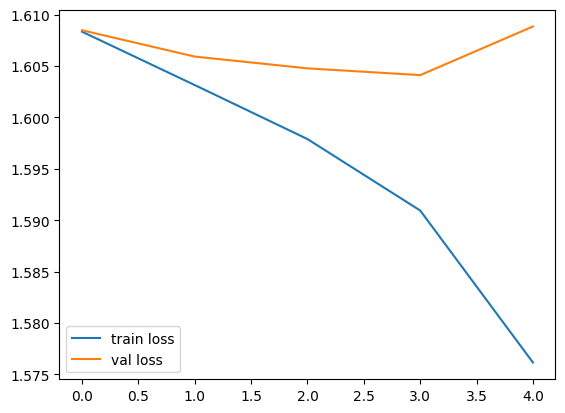

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

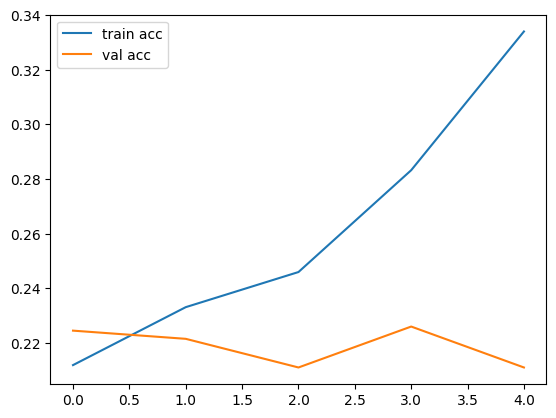

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

## POS tagging in tensorflow

In [ ]:
# It is a many-to-many task

In [ ]:
import nltk
from nltk.corpus import brown

nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
corpus = brown.tagged_sents(tagset='universal')
corpus # A list of list of tuples, each sublist represent a sentence

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [ ]:
len(corpus)

57340

In [ ]:
inputs = []
targets = []

for sentence_tag_pairs in corpus:
  tokens = []
  target = []
  for token, tag in sentence_tag_pairs:
    tokens.append(token)
    target.append(tag)
  inputs.append(tokens)
  targets.append(target)

# Creating seperate lists for word and tag


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Bidirectional
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy


train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    inputs,
    targets,
    test_size=0.3,
)

In [ ]:
# Convert sentences to sequences

MAX_VOCAB_SIZE = None

# capitalization might be useful - test it
should_lowercase = False
word_tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    lower=should_lowercase,
    oov_token='UNK',
)
# otherwise unknown tokens will be removed and len(input) != len(target)
# input words and target words will not be aligned!

word_tokenizer.fit_on_texts(train_inputs)
train_inputs_int = word_tokenizer.texts_to_sequences(train_inputs)
test_inputs_int = word_tokenizer.texts_to_sequences(test_inputs)

In [ ]:
# get word -> integer mapping
word2idx = word_tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 47323 unique tokens.


In [ ]:
# https://stackoverflow.com/questions/11264684/flatten-list-of-lists
def flatten(list_of_lists):
  flattened = [val for sublist in list_of_lists for val in sublist]
  return flattened

all_train_targets = set(flatten(train_targets))
all_train_targets

all_test_targets = set(flatten(test_targets))
all_test_targets

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [ ]:
all_train_targets == all_test_targets

True

In [ ]:
# Convert targets to sequences
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_targets_int = tag_tokenizer.texts_to_sequences(train_targets)
test_targets_int = tag_tokenizer.texts_to_sequences(test_targets)

# save for later
train_targets_int_unpadded = train_targets_int
test_targets_int_unpadded = test_targets_int

train_targets_int_unpadded

In [ ]:
# before padding, find max document length
# because we don't want to truncate any inputs
# which would also truncate targets
maxlen_train = max(len(sent) for sent in train_inputs)
maxlen_test = max(len(sent) for sent in test_inputs)
T = max((maxlen_train, maxlen_test))

In [ ]:
# pad sequences so that we get a N x T matrix
train_inputs_int = pad_sequences(train_inputs_int, maxlen=T)
print('Shape of data train tensor:', train_inputs_int.shape)

Shape of data train tensor: (40138, 180)


In [ ]:
test_inputs_int = pad_sequences(test_inputs_int, maxlen=T)
print('Shape of data test tensor:', test_inputs_int.shape)

Shape of data test tensor: (17202, 180)


In [ ]:
train_targets_int = pad_sequences(train_targets_int, maxlen=T)
print('Shape of train targets tensor:', train_targets_int.shape)

test_targets_int = pad_sequences(test_targets_int, maxlen=T)
print('Shape of test targets tensor:', test_targets_int.shape)

Shape of train targets tensor: (40138, 180)
Shape of test targets tensor: (17202, 180)


In [ ]:
# number of classes
K = len(tag_tokenizer.word_index) + 1
K

13

In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 32

i = Input(shape=(T,))
# mask_zero=True way slower on GPU than CPU!
x = Embedding(V + 1, D, mask_zero=True)(i)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dense(K)(x)

model = Model(i, x)